In [261]:

%load_ext autoreload
%autoreload 2
import json, os, cv2
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import seaborn as sns
import h5py as hf
from tqdm import tqdm
from tqdm import tqdm
import itertools 
from scipy.interpolate import interp1d
from scipy import signal
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import os, fnmatch
from scipy.spatial.distance import cdist
import matplotlib.gridspec as gridspec
from random import sample


import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')

from utils.base_functions import *
from src.utils.auxiliary import flatten_series
from src.utils.path import find
from src.base import BaseInput
from plots import plot_oa

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_hdf(r"D:\obstacle_avoidance\recordings\050323\G8CKRT\oa\processed_G8CKRT_050323_oa.h5")

In [201]:
session = plot_oa(r"D:\obstacle_avoidance\metadata\G8CK\G8CK_oa_042823_050323.json",'blank')
session.gather_session_df('obstacle',6)

6


In [203]:
session.create_consective_df()

In [186]:
session.df['orginal_index'] =  session.df.index

In [202]:
session.df

,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,...,gt_obstacle_cen_x,gt_obstacle_cen_x_cm,gt_obstacle_cen_y,gt_obstacle_cen_y_cm,time,obstacle_cluster,mean_gt_obstacle_cen_x_cm,mean_gt_obstacle_cen_y_cm,cluster_label,orginal_index
0,1,55849.980608,55854.351193,"[55849.982899, 55850.000243, 55850.016243, 558...","[[618, 619, 620, 621, 622, 623, 624, 625, 626,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[678.4732055664062, 678.5654907226562, 679.592...","[263.2254638671875, 264.38568115234375, 265.22...","[670.2373046875, 670.263916015625, 670.7482910...",...,452.143255,35.073053,284.787707,22.091172,4.366667,3,34.628816,21.622061,3.0,1
1,3,55856.703040,55863.809664,"[55856.718592, 55856.735385, 55856.752588, 558...","[[1022, 1023, 1024, 1025, 1026, 1027, 1028, 10...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[681.59326171875, 682.0374755859375, 682.17260...","[261.0768127441406, 261.3218078613281, 261.290...","[671.5408325195312, 672.2661743164062, 672.129...",...,335.134548,25.996610,271.700950,21.076023,7.083333,2,27.380619,21.741046,2.0,3
2,5,55873.899059,55878.777804,"[55873.907904, 55873.92471, 55873.941286, 5587...","[[2053, 2054, 2055, 2056, 2057, 2058, 2059, 20...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[676.9694213867188, 677.7153930664062, 678.769...","[262.11907958984375, 262.3038330078125, 263.46...","[670.2584838867188, 671.1596069335938, 672.537...",...,428.157409,33.212455,361.860593,28.069767,4.866667,5,34.518881,28.096217,5.0,5
3,7,55884.844595,55888.674624,"[55884.845299, 55884.861926, 55884.879436, 558...","[[2709, 2710, 2711, 2712, 2713, 2714, 2715, 27...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[677.1893310546875, 678.1749877929688, 679.715...","[259.8717346191406, 261.8793640136719, 263.211...","[668.1810302734375, 669.8963623046875, 671.902...",...,428.156719,33.212401,361.932817,28.075369,3.816667,5,34.518881,28.096217,5.0,7
4,8,55888.674624,55892.103206,"[55888.68014, 55888.696358, 55888.713036, 5588...","[2939, 2940, 2941, 2942, 2943, 2944, 2945, 294...","[98.96044158935547, 98.02863311767578, 98.9829...","[278.30615234375, 278.5882568359375, 278.59121...","[117.44532012939453, 116.13001251220703, 115.6...","[265.80596923828125, 266.5619812011719, 267.55...","[106.43080139160156, 104.86589813232422, 104.9...",...,327.150463,25.377279,288.506880,22.379670,3.416667,2,27.380619,21.741046,2.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,158,56997.887680,56999.653209,"[56997.904038, 56997.920294, 56997.936742, 569...","[[36468, 36469, 36470, 36471, 36472, 36473, 36...","[684.3792724609375, nan, nan, nan, nan, nan, n...","[275.2332458496094, nan, nan, nan, nan, nan, n...","[671.2802734375, 671.4435424804688, 672.833190...","[270.5364074707031, 268.6509094238281, 268.146...","[676.2732543945312, 677.2616577148438, 677.459...",...,450.239564,35.651579,268.852968,21.288739,1.733333,3,34.628816,21.622061,3.0,158
4572,161,57007.452492,57009.173004,"[57007.457113, 57007.473484, 57007.490496, 570...","[37041, 37042, 37043, 37044, 37045, 37046, 370...","[114.53376770019531, 114.5760269165039, 114.74...","[275.0440979003906, 275.1921691894531, 275.514...","[134.59718322753906, 135.1036834716797, 134.42...","[269.5655517578125, 269.8416748046875, 270.368...","[125.99635314941406, 125.22675323486328, 123.5...",...,361.722589,28.642488,360.470044,28.543307,1.700000,4,26.749110,28.099517,4.0,161
4573,162,57009.173004,57012.446028,"[57009.174016, 57009.191744, 57009.207398, 570...","[[37144, 37145, 37146, 37147, 37148, 37149, 37...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[671.7008056640625, 673

In [204]:
session.con_df

,index,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,...,gt_obstacle_cen_x,gt_obstacle_cen_x_cm,gt_obstacle_cen_y,gt_obstacle_cen_y_cm,time,obstacle_cluster,mean_gt_obstacle_cen_x_cm,mean_gt_obstacle_cen_y_cm,cluster_label,orginal_index
328,1,53950.560793,53955.750912,"[53950.571776, 53950.588467, 53950.605862, 539...","[[1284, 1285, 1286, 1287, 1288, 1289, 1290, 12...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[671.5906982421875, 673.7359619140625, 676.169...","[266.6916198730469, 266.8547058105469, 267.870...","[671.5349731445312, 671.4368286132812, 673.386...",...,334.644096,26.036261,273.916744,21.311501,5.166667,2,27.380619,21.741046,2.0,1
329,2,53955.750912,53958.114393,"[53955.75703, 53955.773632, 53955.791564, 5395...","[1595, 1596, 1597, 1598, 1599, 1600, 1601, 160...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[106.0430908203125, 105.33464813232422, 104.59...","[279.4571533203125, 279.2516784667969, 278.547...","[112.64200592041016, 112.10045623779297, 111.5...",...,335.066369,26.069115,273.639189,21.289906,2.350000,2,27.380619,21.741046,2.0,2
330,3,53958.114393,53961.108915,"[53958.124454, 53958.142169, 53958.15776, 5395...","[[1737, 1738, 1739, 1740, 1741, 1742, 1743, 17...","[682.2976684570312, 683.12744140625, nan, nan,...","[274.8915100097656, 275.080078125, nan, nan, n...","[668.080078125, 670.3260498046875, 672.5081176...","[271.2999267578125, 271.7380676269531, 271.354...","[672.9752197265625, 674.0545654296875, 675.565...",...,334.273028,26.007391,274.551863,21.360915,2.966667,2,27.380619,21.741046,2.0,3
331,4,53961.108915,53964.852940,"[53961.125427, 53961.142144, 53961.15927, 5396...","[1917, 1918, 1919, 1920, 1921, 1922, 1923, 192...","[98.7120132446289, 98.35353088378906, 97.90589...","[277.3341064453125, 277.6127624511719, 277.443...","[117.34370422363281, 116.2473373413086, 115.83...","[267.73638916015625, 267.8100891113281, 267.67...","[107.49760437011719, 104.98799133300781, 104.5...",...,427.679535,33.274683,214.282270,16.671769,3.716667,1,34.437328,16.044181,1.0,4
332,6,53978.456947,53981.152294,"[53978.464729, 53978.481766, 53978.498291, 539...","[2957, 2958, 2959, 2960, 2961, 2962, 2963, 296...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[107.61906433105469, 105.91256713867188, 105.2...","[275.3627624511719, 274.444091796875, 274.7034...","[108.35797882080078, 107.81783294677734, 107.7...",...,427.623105,33.270292,214.359688,16.677793,2.683333,1,34.437328,16.044181,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,211,56176.791718,56178.938214,"[56176.805798, 56176.822694, 56176.839795, 561...","[35083, 35084, 35085, 35086, 35087, 35088, 350...","[112.92366027832031, 111.69530487060547, 114.1...","[277.7599182128906, 277.9961853027344, 279.012...","[133.8013153076172, 131.83428955078125, 129.96...","[273.2581787109375, 272.90325927734375, 271.73...","[121.59797668457031, 119.75728607177734, 119.9...",...,346.274566,27.426451,361.693419,28.647692,2.116667,4,26.749110,28.099517,4.0,211
4286,212,56178.938214,56181.183078,"[56178.939827, 56178.956556, 56178.973644, 561...","[[35211, 35212, 35213, 35214, 35215, 35216, 35...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[675.6560668945312, 677.0065307617188, 677.658...","[265.4602966308594, 266.52032470703125, 266.34...","[676.029052734375, 677.188232421875, 677.70147...",...,345.949407,27.400697,361.773443,28.654030,2.233333,4,26.749110,28.099517,4.0,212
4287,213,56181.183078,56183.681817,"[56181.190604, 56181.208166, 56181.224038, 561...","[35346, 35347, 35348, 35349, 35350, 35351, 353...","[113.5621337890625, 112.67525482177734, 115.17...","[278.27484130859375, 278.41448974609375, 279.3...","[134.09996032

In [205]:
con_df

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,rightear_y,...,gt_obstacleBL_y_cm,gt_obstacle_cen_x,gt_obstacle_cen_x_cm,gt_obstacle_cen_y,gt_obstacle_cen_y_cm,time,obstacle_cluster,mean_gt_obstacle_cen_x_cm,mean_gt_obstacle_cen_y_cm,cluster_label
328,53950.560793,53955.750912,"[53950.571776, 53950.588467, 53950.605862, 539...","[[1284, 1285, 1286, 1287, 1288, 1289, 1290, 12...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[671.5906982421875, 673.7359619140625, 676.169...","[266.6916198730469, 266.8547058105469, 267.870...","[671.5349731445312, 671.4368286132812, 673.386...","[285.6947937011719, 286.2433776855469, 286.085...",...,28.806605,334.644096,26.036261,273.916744,21.311501,5.166667,2,26.951499,21.709905,2.0
329,53955.750912,53958.114393,"[53955.75703, 53955.773632, 53955.791564, 5395...","[1595, 1596, 1597, 1598, 1599, 1600, 1601, 160...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[106.0430908203125, 105.33464813232422, 104.59...","[279.4571533203125, 279.2516784667969, 278.547...","[112.64200592041016, 112.10045623779297, 111.5...","[263.213623046875, 262.81658935546875, 261.931...",...,28.806605,335.066369,26.069115,273.639189,21.289906,2.350000,2,26.951499,21.709905,2.0
330,53958.114393,53961.108915,"[53958.124454, 53958.142169, 53958.15776, 5395...","[[1737, 1738, 1739, 1740, 1741, 1742, 1743, 17...","[682.2976684570312, 683.12744140625, nan, nan,...","[274.8915100097656, 275.080078125, nan, nan, n...","[668.080078125, 670.3260498046875, 672.5081176...","[271.2999267578125, 271.7380676269531, 271.354...","[672.9752197265625, 674.0545654296875, 675.565...","[288.57000732421875, 288.03387451171875, 286.7...",...,28.806605,334.273028,26.007391,274.551863,21.360915,2.966667,2,26.951499,21.709905,2.0
331,53961.108915,53964.852940,"[53961.125427, 53961.142144, 53961.15927, 5396...","[1917, 1918, 1919, 1920, 1921, 1922, 1923, 192...","[98.7120132446289, 98.35353088378906, 97.90589...","[277.3341064453125, 277.6127624511719, 277.443...","[117.34370422363281, 116.2473373413086, 115.83...","[267.73638916015625, 267.8100891113281, 267.67...","[107.49760437011719, 104.98799133300781, 104.5...","[252.53250122070312, 255.27244567871094, 255.2...",...,23.003431,427.679535,33.274683,214.282270,16.671769,3.716667,1,33.421126,16.326184,1.0
332,53978.456947,53981.152294,"[53978.464729, 53978.481766, 53978.498291, 539...","[2957, 2958, 2959, 2960, 2961, 2962, 2963, 296...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[107.61906433105469, 105.91256713867188, 105.2...","[275.3627624511719, 274.444091796875, 274.7034...","[108.35797882080078, 107.81783294677734, 107.7...","[259.07940673828125, 257.42010498046875, 257.5...",...,23.003431,427.623105,33.270292,214.359688,16.677793,2.683333,1,33.421126,16.326184,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,56176.791718,56178.938214,"[56176.805798, 56176.822694, 56176.839795, 561...","[35083, 35084, 35085, 35086, 35087, 35088, 350...","[112.92366027832031, 111.69530487060547, 114.1...","[277.7599182128906, 277.9961853027344, 279.012...","[133.8013153076172, 131.83428955078125, 129.96...","[273.2581787109375, 272.90325927734375, 271.73...","[121.59797668457031, 119.75728607177734, 119.9...","[257.4905090332031, 258.22882080078125, 256.70...",...,35.039130,346.274566,27.426451,361.693419,28.647692,2.116667,4,27.667612,28.536574,4.0
4286,56178.938214,56181.183078,"[56178.939827, 56178.956556, 56178.973644, 561...","[[35211, 35212, 35213, 35214, 35215, 35216, 35...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[675.6560668945312, 677.0065307617188, 677.658...","[265.4602966308594, 266.52032470703125, 266.34...","[676.029052734375, 677.188232421875, 677.70

In [55]:
"""get average obstacle postition"""
keys = list_columns(session.df,['gt'])
keys = [key for key in keys if 'cen' not in key]
for cluster,cluster_frame in session.df.groupby('obstacle_cluster'):
    for key in keys:
        session.df.loc[session.df.obstacle_cluster ==cluster,key] = cluster_frame[key].mean()

"""get average areana and port postition """
keys = list_columns(con_df,['arena','port'])
keys = [i for i in keys if 'cm' in i]
keys = [i for i in keys if 'portB' not in i]
keys
for key in keys:
    con_df[key] = con_df[key].mean()

In [161]:
con_df = pd.DataFrame()
df = session.df.reset_index(drop=True)
for animal,animal_frame in df.groupby('animal'):
    for date, date_frame in animal_frame.groupby('date'):
        repeats_list = find_consecutive_repeats(date_frame['obstacle_cluster'])
        for i in range(len(repeats_list)):
            con_df = con_df.append(date_frame.loc[repeats_list[i][0]:repeats_list[i][1]])

In [ ]:
def create_consective_df(self):
    con_df = pd.DataFrame()
    df = self.df.reset_index(drop=True)
    for animal,animal_frame in df.groupby('animal'):
        for date, date_frame in animal_frame.groupby('date'):
            repeats_list = find_consecutive_repeats(date_frame['obstacle_cluster'])
            for i in range(len(repeats_list)):
                con_df = con_df.append(date_frame.loc[repeats_list[i][0]:repeats_list[i][1]])
    self.con_df = con_df

(array([600.,   0., 498.,   0., 444.,   0., 429.,   0., 441., 513.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

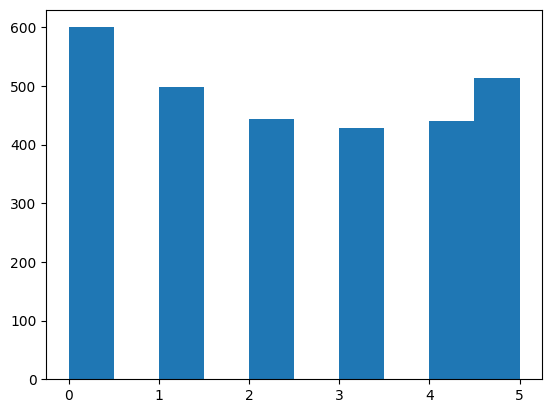

In [58]:
plt.hist(con_df['obstacle_cluster'])

In [59]:
"""get average areana and port postition """
keys = list_columns(con_df,['arena','port'])
keys = [i for i in keys if 'cm' in i]
keys = [i for i in keys if 'portB' not in i]
keys
for key in keys:
    con_df[key] = con_df[key].mean()

In [31]:
cluster2 = con_df[con_df.obstacle_cluster==2]
cluster2 = cluster2.reset_index(drop=True)

In [32]:
cluster0 = con_df[con_df.obstacle_cluster==0]
cluster0 = cluster0.reset_index(drop=True)

In [271]:
cluster0 = con_df[con_df.obstacle_cluster==0]
cluster0 = cluster0.reset_index(drop=True)

In [274]:
trials = find_consecutive_repeats(cluster0['obstacle_cluster'])

In [6]:
cluster2

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,rightear_y,...,gt_obstacleBL_y_cm,gt_obstacle_cen_x,gt_obstacle_cen_x_cm,gt_obstacle_cen_y,gt_obstacle_cen_y_cm,time,obstacle_cluster,mean_gt_obstacle_cen_x_cm,mean_gt_obstacle_cen_y_cm,cluster_label
0,53950.560793,53955.750912,"[53950.571776, 53950.588467, 53950.605862, 539...","[[1284, 1285, 1286, 1287, 1288, 1289, 1290, 12...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[671.5906982421875, 673.7359619140625, 676.169...","[266.6916198730469, 266.8547058105469, 267.870...","[671.5349731445312, 671.4368286132812, 673.386...","[285.6947937011719, 286.2433776855469, 286.085...",...,28.431169,334.644096,26.036261,273.916744,21.311501,5.166667,2,26.951499,21.709905,2.0
1,53955.750912,53958.114393,"[53955.75703, 53955.773632, 53955.791564, 5395...","[1595, 1596, 1597, 1598, 1599, 1600, 1601, 160...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[106.0430908203125, 105.33464813232422, 104.59...","[279.4571533203125, 279.2516784667969, 278.547...","[112.64200592041016, 112.10045623779297, 111.5...","[263.213623046875, 262.81658935546875, 261.931...",...,28.357681,335.066369,26.069115,273.639189,21.289906,2.350000,2,26.951499,21.709905,2.0
2,53958.114393,53961.108915,"[53958.124454, 53958.142169, 53958.15776, 5395...","[[1737, 1738, 1739, 1740, 1741, 1742, 1743, 17...","[682.2976684570312, 683.12744140625, nan, nan,...","[274.8915100097656, 275.080078125, nan, nan, n...","[668.080078125, 670.3260498046875, 672.5081176...","[271.2999267578125, 271.7380676269531, 271.354...","[672.9752197265625, 674.0545654296875, 675.565...","[288.57000732421875, 288.03387451171875, 286.7...",...,28.508715,334.273028,26.007391,274.551863,21.360915,2.966667,2,26.951499,21.709905,2.0
3,54220.002291,54226.900556,"[54220.015424, 54220.031884, 54220.048524, 542...","[17445, 17446, 17447, 17448, 17449, 17450, 174...","[100.52117156982422, 100.03180694580078, 99.90...","[274.6986999511719, 275.3146667480469, 275.715...","[119.6432113647461, 118.6192626953125, 118.454...","[270.5403747558594, 271.0550231933594, 271.769...","[111.51775360107422, 110.54425811767578, 110.3...","[252.4542236328125, 252.58871459960938, 253.42...",...,28.804812,353.467832,27.500801,279.255734,21.726889,6.866667,2,26.951499,21.709905,2.0
4,54226.900556,54231.996454,"[54226.901017, 54226.91872, 54226.93431, 54226...","[[17858, 17859, 17860, 17861, 17862, 17863, 17...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[675.786865234375, 676.341064453125, 677.32141...","[260.25384521484375, 260.55340576171875, 261.6...","[669.2697143554688, 670.5416259765625, 671.949...","[278.3182373046875, 279.4547424316406, 280.420...",...,28.802141,353.127930,27.474356,279.040837,21.710170,5.083333,2,26.951499,21.709905,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,56125.857894,56128.438707,"[56125.87168, 56125.888345, 56125.904934, 5612...","[[32028, 32029, 32030, 32031, 32032, 32033, 32...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[678.2108764648438, 678.5476684570312, 679.354...","[260.739501953125, 260.95916748046875, 261.654...","[675.5797119140625, 676.0157470703125, 676.797...","[279.61517333984375, 280.574462890625, 281.342...",...,29.054485,369.267720,29.247609,275.512075,21.821754,2.550000,2,28.262106,21.868778,2.0
442,56128.438707,56129.900928,"[56128.440051, 56128.455884, 56128.472537, 561...","[32182, 32183, 32184, 32185, 32186, 32187, 321...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[121.80284881591797, 122.16238403320312, 121.8...","[276.82086181640625, 276.0662536621094, 275.18...","[120.39193725585938, 120.50098419189453, 120.5...","[25

In [ ]:
list(range(0,len(cluster2),3))

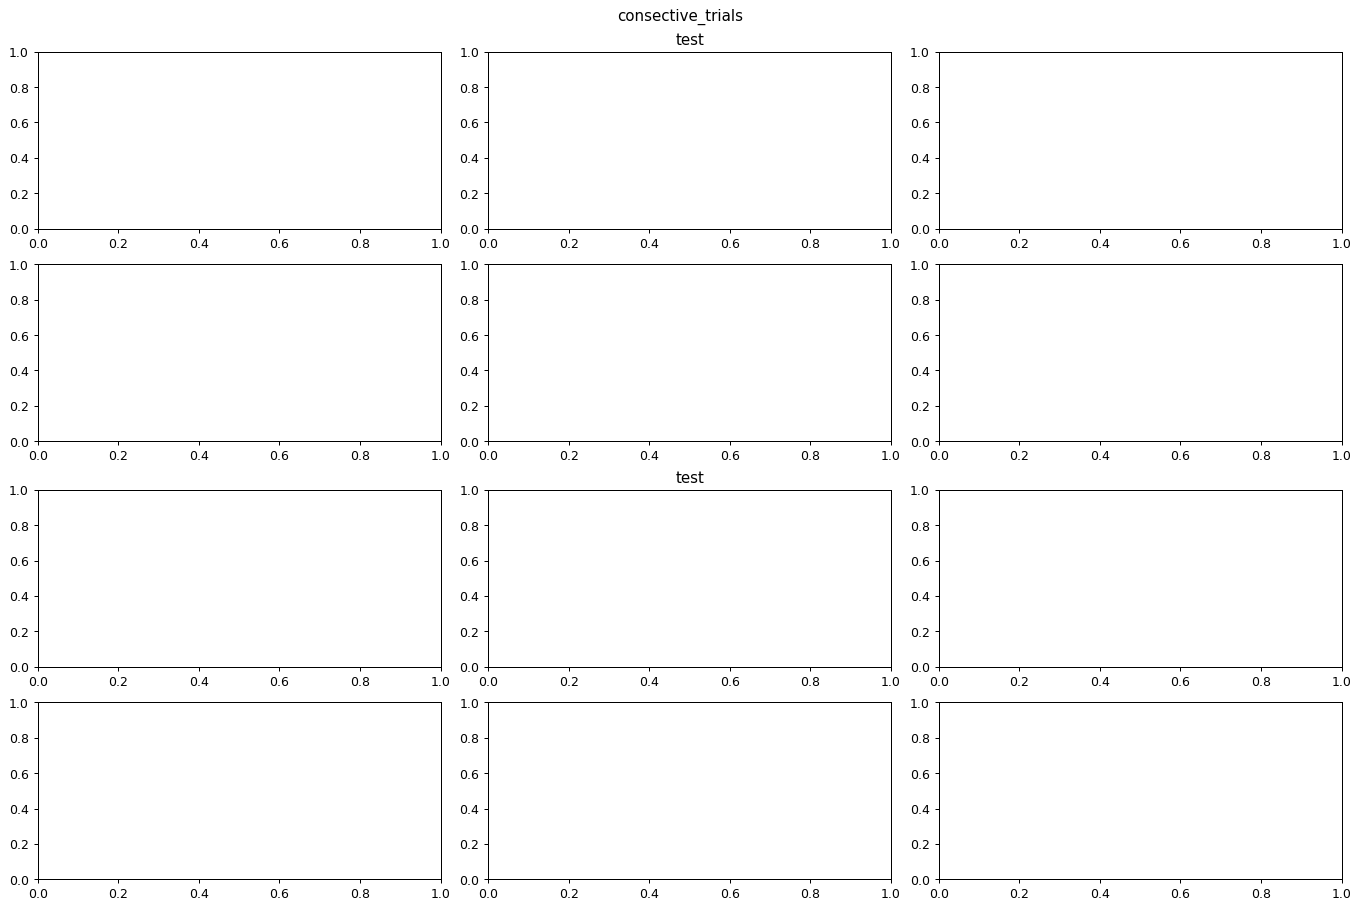

In [208]:
fig = plt.figure(constrained_layout=False, figsize=(15, 10),dpi=90)
fig.suptitle('consective_trials')
spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)
panel_1 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[0])
ax1 = fig.add_subplot(panel_1[0,0])
ax2 = fig.add_subplot(panel_1[0,1])
ax2.set_title('test')
ax3 = fig.add_subplot(panel_1[0,2])
ax4 = fig.add_subplot(panel_1[1,0])
ax5 = fig.add_subplot(panel_1[1,1])
ax6 = fig.add_subplot(panel_1[1,2])

panel_2 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[1])
ax1 = fig.add_subplot(panel_2[0,0])
ax2 = fig.add_subplot(panel_2[0,1])
ax2.set_title('test')
ax3 = fig.add_subplot(panel_2[0,2])
ax4 = fig.add_subplot(panel_2[1,0])
ax5 = fig.add_subplot(panel_2[1,1])
ax6 = fig.add_subplot(panel_2[1,2])


In [89]:

keys = list_columns(con_df,['arena','port'])
keys = [i for i in keys if 'cm' in i]
keys = [i for i in keys if 'portB' not in i]
keys
for key in keys:
    con_df[key] = con_df[key].mean()

In [90]:
cluster2 = con_df[con_df.obstacle_cluster==2]
cluster2 = cluster2.reset_index(drop=True)

In [ ]:
plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                            [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')

In [152]:
def plot_arena(df,axis):
    arena_x = pd.unique(df[['arenaTL_x_cm',
    'arenaTR_x_cm','arenaBR_x_cm',
    'arenaBL_x_cm',
    'arenaTL_x_cm']].values.ravel('K'))

    arena_y = pd.unique(df[['arenaTL_y_cm',
    'arenaTR_y_cm','arenaBR_y_cm',
    'arenaBL_y_cm',
    'arenaTL_y_cm']].values.ravel('K'))

    obstacle_x = pd.unique(df[['gt_obstacleTL_x_cm',
    'gt_obstacleTR_x_cm','gt_obstacleBR_x_cm',
    'gt_obstacleBL_x_cm',
    'gt_obstacleTL_x_cm']].values.ravel('K'))

    obstacle_y =  pd.unique(df[['gt_obstacleTL_y_cm',
    'gt_obstacleTR_y_cm','gt_obstacleBR_y_cm',
    'gt_obstacleBL_y_cm',
    'gt_obstacleTL_y_cm']].values.ravel('K'))

    left_port =  pd.unique(df[['leftportT_x_cm','leftportT_y_cm']].values.ravel('K'))

    right_port = pd.unique(df[['rightportT_x_cm','rightportT_y_cm']].values.ravel('K'))

    axis.plot([obstacle_x[0],obstacle_x[1],obstacle_x[2],obstacle_x[3],obstacle_x[0]],
                          [obstacle_y[0],obstacle_y[1],obstacle_y[2],obstacle_y[3],obstacle_y[0]],c='k')
    
    axis.plot([arena_x[0],arena_x[1],arena_x[2],arena_x[3],arena_x[0]],
                          [arena_y[0],arena_y[1],arena_y[2],arena_y[3],arena_y[0]],c='k')

    axis.scatter(left_port[0],left_port[1],c='purple',s=200,marker = 's')
    axis.scatter(right_port[0],right_port[1],c='r',s=200,marker = 's')

    
    axis.set_ylim([51,0]); axis.set_xlim([0, 71])
    


In [62]:
pd.unique(df[['gt_obstacleTL_x_cm',
    'gt_obstacleBR_x_cm','gt_obstacleBL_x_cm',
    'gt_obstacleTL_x_cm',
    'gt_obstacleTL_x_cm']].values.ravel('K'))

array([31.91009669, 37.10215804, 31.98712025])

In [46]:
con_df.columns.to_list()

array(['first_poke', 'second_poke', 'trial_timestamps', 'trial_vidframes',
       'nose_x', 'nose_y', 'leftear_x', 'leftear_y', 'rightear_x',
       'rightear_y', 'spine_x', 'spine_y', 'midspine_x', 'midspine_y',
       'tailbase_x', 'tailbase_y', 'midtail_x', 'midtail_y', 'tailend_x',
       'tailend_y', 'arenaTL_x', 'arenaTL_y', 'arenaTR_x', 'arenaTR_y',
       'arenaBL_x', 'arenaBL_y', 'arenaBR_x', 'arenaBR_y', 'obstacleTL_x',
       'obstacleTL_y', 'obstacleTR_x', 'obstacleTR_y', 'obstacleBR_x',
       'obstacleBR_y', 'obstacleBL_x', 'obstacleBL_y', 'leftportT_x',
       'leftportT_y', 'leftportB_x', 'leftportB_y', 'rightportT_x',
       'rightportT_y', 'rightportB_x', 'rightportB_y', 'len', 'animal',
       'date', 'task', 'nose_x_cm', 'nose_y_cm', 'leftear_x_cm',
       'leftear_y_cm', 'rightear_x_cm', 'rightear_y_cm', 'spine_x_cm',
       'spine_y_cm', 'midspine_x_cm', 'midspine_y_cm', 'tailbase_x_cm',
       'tailbase_y_cm', 'midtail_x_cm', 'midtail_y_cm', 'tailend_x_cm',
     

In [48]:
con_df['gt_obstacleTR_x_cm']

328     28.740943
329     28.778327
330     28.813422
331     35.429545
332     35.449101
          ...    
4285    29.937388
4286    29.843951
4287    30.257650
4288    30.111442
4289    30.375232
Name: gt_obstacleTR_x_cm, Length: 2925, dtype: float64

In [153]:
"""create color dict for unique items in list"""
def create_color_dict(df,key,color_pallete):
    color_labels = color_labels = df[key].unique()
    rgb_values = sns.color_palette(color_pallete, len(color_labels))
    color_map = dict(zip(color_labels, rgb_values))
    return color_map

In [207]:
"""consecutive plots"""

savepath = "D:/obstacle_avoidance/recordings"
savepath_session = os.path.join(*[savepath,'figures'])
key = 'animal'
color_pallete = 'colorblind'
color_map = create_color_dict(session.con_df,key,color_pallete)
pdf = PdfPages(os.path.join((savepath_session), 'by_' + str(key)+ '_' 'consecutive.pdf'))
for obstacle, obstalce_frame in session.con_df.groupby('obstacle_cluster'):

    df = obstalce_frame
    df = df.reset_index(drop=True)
    fig = plt.figure(constrained_layout=False, figsize=(15, 7.5),dpi=90)
    fig.suptitle('by_' + str(key) + str(pd.unique(df['obstacle_cluster'])))
    spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)
    #panel_1 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[0])


    """Top Row"""
    ax1 = fig.add_subplot(spec2[0,0])
    ax1.set_title('right')
    plot_arena(df,ax1,obstacle=True)
    ax2 = fig.add_subplot(spec2[0,1])
    plot_arena(df,ax2,obstacle=True)
    ax3 = fig.add_subplot(spec2[0,2])
    plot_arena(df,ax3,obstacle=True)



    """Bottom Row"""
    ax4 = fig.add_subplot(spec2[1,0])
    ax4.set_title('left')
    plot_arena(df,ax4,obstacle=True)
    ax5 = fig.add_subplot(spec2[1,1])
    plot_arena(df,ax5,obstacle=True)
    ax6 = fig.add_subplot(spec2[1,2])
    plot_arena(df,ax6,obstacle=True)



    """Loop through data frame"""


    trial_list = list(range(0,len(df),3))
    trial_list = create_sublists(trial_list)
    print(len(trial_list))
    trial_list = sample(trial_list,100)
    print(len(trial_list))
    for sublist in trial_list:
        trial = df.iloc[sublist[0]:sublist[1]]
        trial = trial.reset_index(drop=True)
        color = color_map.get(pd.unique(trial[key]).item())
        if trial.at[0,'odd'] == 'right':
            ax1.plot(trial.at[0,'ts_nose_x_cm'],trial.at[0,'ts_nose_y_cm'],c=color)
            markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
            ax1.legend(markers, color_map.keys(), numpoints=1)
            ax2.plot(trial.at[1,'ts_nose_x_cm'],trial.at[1,'ts_nose_y_cm'],c=color)
            ax3.plot(trial.at[2,'ts_nose_x_cm'],trial.at[2,'ts_nose_y_cm'],c=color)
        if trial.at[0,'odd'] == 'left':
            ax4.plot(trial.at[0,'ts_nose_x_cm'],trial.at[0,'ts_nose_y_cm'],c=color)
            markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
            ax4.legend(markers, color_map.keys(), numpoints=1)
            ax5.plot(trial.at[1,'ts_nose_x_cm'],trial.at[1,'ts_nose_y_cm'],c=color)
            ax6.plot(trial.at[2,'ts_nose_x_cm'],trial.at[2,'ts_nose_y_cm'],c=color)
    pdf.savefig(); plt.close()
pdf.close()


201
100
164
100
149
100
140
100
146
100
170
100


In [280]:
savepath = "D:/obstacle_avoidance/recordings"
savepath_session = os.path.join(*[savepath,'figures'])


key='date'
color_pallete = 'rocket'
color_map = create_color_dict(session.df,key,color_pallete)

pdf = PdfPages(os.path.join((savepath_session), 'by ' + str(key)+ ' '+ 'and ' +' obstalce.pdf'))

fig = plt.figure(constrained_layout=False, figsize=(15, 15),dpi=90)
fig.suptitle('by ' + key + ' '+ 'and ' +'obstalce ')
spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)


"""Right"""
panel_1 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[0])
ax1 = fig.add_subplot(panel_1[0,0])
plot_arena(session.df,ax1)
ax2 = fig.add_subplot(panel_1[0,1])
plot_arena(session.df,ax2)

ax3 = fig.add_subplot(panel_1[0,2])
plot_arena(session.df,ax3)
ax4 = fig.add_subplot(panel_1[1,0])
plot_arena(session.df,ax4)
ax5 = fig.add_subplot(panel_1[1,1])
plot_arena(session.df,ax5)
ax6 = fig.add_subplot(panel_1[1,2])
plot_arena(session.df,ax6)

right_axs = [ax1,ax2,ax3,ax4,ax5,ax6]
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
ax1.legend(markers, color_map.keys(), numpoints=1,title = 'right')


"""Left """
panel_2 = gridspec.GridSpecFromSubplotSpec(2,3,subplot_spec=spec2[1])
ax7 = fig.add_subplot(panel_2[0,0])
plot_arena(session.df,ax7)
ax8 = fig.add_subplot(panel_2[0,1])
plot_arena(session.df,ax8)
ax8.set_title('left')
ax9 = fig.add_subplot(panel_2[0,2])
plot_arena(session.df,ax9)
ax10 = fig.add_subplot(panel_2[1,0])
plot_arena(session.df,ax10)
ax11= fig.add_subplot(panel_2[1,1])
plot_arena(session.df,ax11)
ax12 = fig.add_subplot(panel_2[1,2])
plot_arena(session.df,ax12)

left_axs = [ax7,ax8,ax9,ax10,ax11,ax12]
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in color_map.values()]
ax7.legend(markers, color_map.keys(), numpoints=1,title = 'left')



""" plot trials"""
right_obstacle_dict = dict(zip(pd.unique(session.df['obstacle_cluster'].sort_values().to_list()),right_axs))
left_obstacle_dict = dict(zip(pd.unique(session.df['obstacle_cluster'].sort_values().to_list()),left_axs))

for direction, direction_frame in session.df.groupby(['odd']):
    for cluster, cluster_frame in direction_frame.groupby(['obstacle_cluster']):
        cluster_frame = cluster_frame.sample(50)
        right_obstacle_axis = right_obstacle_dict.get(cluster)
        left_obstalce_axis = left_obstacle_dict.get(cluster)
        plot_obstacle(cluster_frame,right_obstacle_axis,cluster)
        plot_obstacle(cluster_frame,left_obstalce_axis,cluster)
        which_axis.set_title(str(cluster))
        for ind,row in cluster_frame.iterrows():
            color = color_map.get(pd.unique(row[key]).item())
            if direction == 'right':
                which_axis = right_obstacle_dict.get(cluster)
                which_axis.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'],c = color)
            if direction == 'left':
                which_axis = left_obstacle_dict.get(cluster)
                which_axis.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'],c = color)
pdf.savefig(); plt.close()
pdf.close()
            




In [251]:
right_obstacle_dict.get(0)

<AxesSubplot: >

In [241]:
right_axs = [ax1,ax2,ax3,ax4,ax5,ax6]
left_axs = [ax7,ax8,ax9,ax10,ax11,ax12]
right_obstacle_dict = dict(zip(pd.unique(session.df['obstacle_cluster'].sort_values().to_list()),right_axs))
left_obstacle_dict = dict(zip(pd.unique(session.df['obstacle_cluster'].sort_values().to_list()),left_axs))

In [243]:
left_obstacle_dict


{0: <AxesSubplot: >,
 1: <AxesSubplot: title={'center': 'test'}>,
 2: <AxesSubplot: >,
 3: <AxesSubplot: >,
 4: <AxesSubplot: >,
 5: <AxesSubplot: >}

In [246]:
keys = list_columns(session.df,['gt'])
keys = [key for key in keys if 'cen' not in key]
for key in keys:
    session.df.loc[session.df.obstacle_cluster ==0,key] = session.df.loc[session.df.obstacle_cluster ==0,key].mean()

In [249]:
 session.df.loc[session.df.obstacle_cluster ==1,key]

13      22.992026
14      22.992026
20      22.992026
21      22.992026
22      22.992026
          ...    
4527    22.992026
4538    22.992026
4539    22.992026
4556    22.992026
4559    22.992026
Name: gt_obstacleBL_y_cm, Length: 786, dtype: float64

In [8]:
def create_sublists(lst):
    """
    Create a list of sublists, where each sublist contains the n and n+1 index elements from the original list.

    Args:
        lst (list): The original list of integers.

    Returns:
        list: A list of sublists, where each sublist contains the n and n+1 index elements from the original list.
    """
    sublists = []
    for i in range(len(lst)-1):
        sublists.append([lst[i], lst[i+1]])
    return sublists

In [11]:

trial_list = list(range(0,len(cluster2),3))
trial_list = create_sublists(trial_list)
for sublist in trial_list:
    trial = cluster2.iloc[sublist[0]:sublist[1]]
    trial = trial.reset_index(drop=True)
    

In [12]:
trial

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,rightear_y,...,gt_obstacleBL_y_cm,gt_obstacle_cen_x,gt_obstacle_cen_x_cm,gt_obstacle_cen_y,gt_obstacle_cen_y_cm,time,obstacle_cluster,mean_gt_obstacle_cen_x_cm,mean_gt_obstacle_cen_y_cm,cluster_label
0,56125.857894,56128.438707,"[56125.87168, 56125.888345, 56125.904934, 5612...","[[32028, 32029, 32030, 32031, 32032, 32033, 32...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[678.2108764648438, 678.5476684570312, 679.354...","[260.739501953125, 260.95916748046875, 261.654...","[675.5797119140625, 676.0157470703125, 676.797...","[279.61517333984375, 280.574462890625, 281.342...",...,29.054485,369.267720,29.247609,275.512075,21.821754,2.550000,2,28.262106,21.868778,2.0
1,56128.438707,56129.900928,"[56128.440051, 56128.455884, 56128.472537, 561...","[32182, 32183, 32184, 32185, 32186, 32187, 321...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[121.80284881591797, 122.16238403320312, 121.8...","[276.82086181640625, 276.0662536621094, 275.18...","[120.39193725585938, 120.50098419189453, 120.5...","[259.9522399902344, 259.4812927246094, 258.881...",...,29.057551,369.384788,29.256881,275.998691,21.860296,1.450000,2,28.262106,21.868778,2.0
2,56181.183078,56183.681817,"[56181.190604, 56181.208166, 56181.224038, 561...","[35346, 35347, 35348, 35349, 35350, 35351, 353...","[113.5621337890625, 112.67525482177734, 115.17...","[278.27484130859375, 278.41448974609375, 279.3...","[134.09996032714844, 133.15447998046875, 131.9...","[273.651611328125, 273.7947082519531, 273.4187...","[122.84756469726562, 122.52422332763672, 121.6...","[256.4916076660156, 257.0201721191406, 256.730...",...,28.256573,349.909051,27.714318,267.257766,21.167977,2.483333,2,28.262106,21.868778,2.0


In [104]:
count1

149

In [ ]:
ax1 = fig.add_subplot(spec2[0,0])
ax2 = fig.add_subplot(spec2[0,1])
ax3 = fig.add_subplot(spec2[0,2])
ax4 = fig.add_subplot(spec2[1,0])
ax5 = fig.add_subplot(spec2[1,1])
ax6 = fig.add_subplot(spec2[1,2])

In [234]:
repeats_list

[(7, 9, 3, 3),
 (10, 12, 2, 3),
 (15, 17, 0, 3),
 (20, 22, 1, 3),
 (24, 26, 5, 3),
 (29, 31, 2, 3),
 (32, 34, 1, 3),
 (35, 37, 3, 3),
 (38, 40, 0, 3),
 (41, 43, 2, 3),
 (46, 48, 2, 3),
 (49, 51, 4, 3),
 (52, 54, 0, 3),
 (62, 64, 2, 3),
 (69, 71, 2, 3),
 (72, 74, 3, 3),
 (77, 79, 0, 3),
 (87, 89, 5, 3),
 (99, 101, 0, 3),
 (103, 105, 3, 3),
 (113, 115, 1, 3),
 (119, 121, 3, 3),
 (129, 131, 1, 3),
 (133, 135, 3, 3),
 (141, 143, 2, 3),
 (144, 146, 3, 3),
 (153, 155, 3, 3),
 (158, 160, 5, 3),
 (161, 163, 0, 3),
 (166, 168, 0, 3),
 (169, 171, 1, 3),
 (172, 174, 2, 3),
 (181, 183, 2, 3),
 (187, 189, 2, 3),
 (190, 192, 3, 3),
 (193, 195, 5, 3),
 (196, 198, 4, 3),
 (199, 201, 0, 3),
 (204, 206, 1, 3),
 (207, 209, 0, 3),
 (212, 214, 2, 3),
 (222, 224, 3, 3),
 (225, 227, 0, 3),
 (228, 230, 2, 3),
 (231, 233, 1, 3),
 (235, 237, 5, 3),
 (241, 243, 1, 3),
 (244, 246, 5, 3),
 (247, 249, 2, 3),
 (250, 252, 4, 3),
 (265, 267, 3, 3),
 (280, 282, 3, 3),
 (283, 285, 2, 3),
 (286, 288, 0, 3),
 (289, 291, 2

In [ ]:
by_animal = self.df.groupby(['animal'])
for animal,animal_frame in by_animal:
    by_date = animal_frame.groupby(['date'])
    for date, date_frame in by_date:
        df = date_frame
        df = df.reset_index()
        savepath_session = os.path.join(*[savepath,str(pd.unique(df.date).item()),str(pd.unique(df.animal).item()),str(pd.unique(df.task).item())])
        con_df = pd.DataFrame()
        obstacle_cluster_list = df['obstacle_cluster']
        con_list = find_consecutive_repeats(obstacle_cluster_list)
        for i in range(len(con_list)):
            con_df = con_df.append(df.loc[con_list[i][0]:con_list[i][1]])
        con_df = con_df.reset_index()

(array([ 503., 1821., 1149.,  531.,  277.,  131.,   78.,   55.,   25.,
           6.]),
 array([1.06666667, 1.795     , 2.52333333, 3.25166667, 3.98      ,
        4.70833333, 5.43666667, 6.165     , 6.89333333, 7.62166667,
        8.35      ]),
 <BarContainer object of 10 artists>)

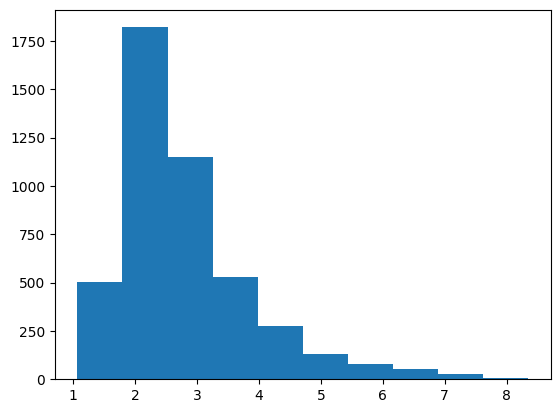

In [223]:
plt.hist(session.df.time)

(array([903.,   0., 789.,   0., 683.,   0., 651.,   0., 677., 873.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

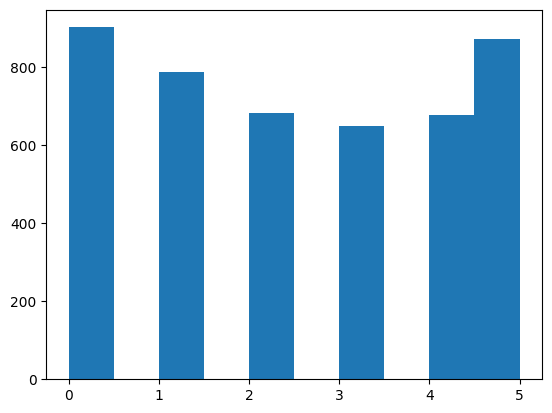

In [224]:
plt.hist(session.df.obstacle_cluster)

In [6]:
session.plot_headangle()

In [25]:
session.plot_single_trial()

In [20]:
session.df['arenaBL_x_cm']

0       5.646209
1       5.646209
2       5.646209
3       5.646209
4       5.646209
          ...   
1871    5.672169
1872    5.672169
1873    5.672169
1874    5.672169
1875    5.672169
Name: arenaBL_x_cm, Length: 1876, dtype: float64

In [21]:
session.df['arenaBR_x_cm']

0       54.565617
1       54.565617
2       54.565617
3       54.565617
4       54.565617
          ...    
1871    54.523038
1872    54.523038
1873    54.523038
1874    54.523038
1875    54.523038
Name: arenaBR_x_cm, Length: 1876, dtype: float64

In [26]:
session.df

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,rightear_y,...,obstacle_intersect_body_y,all_obstacle_intersect_nose_x,all_obstacle_intersect_nose_y,obstacle_intersect_nose_x,obstacle_intersect_nose_y,normalized_counts_intersect_nose_y,sum_normalized_counts_intersect_nose_y,bins_intersect_nose_y,mean_normalized_counts_intersect_nose_y,facing_angle
0,55849.980608,55854.351193,"[55849.982899, 55850.000243, 55850.016243, 558...","[[618, 619, 620, 621, 622, 623, 624, 625, 626,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[678.4732055664062, 678.5654907226562, 679.592...","[263.2254638671875, 264.38568115234375, 265.22...","[670.2373046875, 670.263916015625, 670.7482910...","[276.73388671875, 277.7872619628906, 278.91140...",...,"[27.7532377778558, 28.103557647627095, 27.6567...","[37.77075961249322, 37.69659493068054, 37.6853...","[30.842176962090264, 27.407107539763246, 26.88...","[37.77075961249322, 37.69659493068054, 37.6853...","[30.842176962090264, 27.407107539763246, 26.88...","[0, 0, 0, 0, 0, 0.6421052631578947, 0.17894736...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.014387351778656127, 0.14353582521282104, 0....",True
1,55856.703040,55863.809664,"[55856.718592, 55856.735385, 55856.752588, 558...","[[1022, 1023, 1024, 1025, 1026, 1027, 1028, 10...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[681.59326171875, 682.0374755859375, 682.17260...","[261.0768127441406, 261.3218078613281, 261.290...","[671.5408325195312, 672.2661743164062, 672.129...","[273.2928466796875, 274.0093688964844, 274.292...",...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[28.452353435294953, 28.53632420364538, 28.556...","[31.292867835058622, 26.90220050078688, 25.841...","[0.1388888888888889, 0.3055555555555557, 0.027...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.05084169773459055, 0.2878170482124338, 0.16...",True
2,55873.899059,55878.777804,"[55873.907904, 55873.92471, 55873.941286, 5587...","[[2053, 2054, 2055, 2056, 2057, 2058, 2059, 20...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[676.9694213867188, 677.7153930664062, 678.769...","[262.11907958984375, 262.3038330078125, 263.46...","[670.2584838867188, 671.1596069335938, 672.537...","[278.8973693847656, 278.86993408203125, 278.46...",...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[35.82546545272626, 35.811424428703006, 35.768...","[29.59881752890165, 28.77072539106614, 26.2619...","[35.82546545272626, 35.811424428703006, 35.768...","[29.59881752890165, 28.77072539106614, 26.2619...","[0.13333333333333333, 0.2666666666666666, 0.13...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.0433572060531616, 0.16093533868191634, 0.11...",True
3,55884.844595,55888.674624,"[55884.845299, 55884.861926, 55884.879436, 558...","[[2709, 2710, 2711, 2712, 2713, 2714, 2715, 27...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[677.1893310546875, 678.1749877929688, 679.715...","[259.8717346191406, 261.8793640136719, 263.211...","[668.1810302734375, 669.8963623046875, 671.902...","[274.5780029296875, 275.8729248046875, 276.339...",...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.011553153381...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 40.584934531082...","[36.01155315338105, 35.99599112212618, 35.9483...","[40.58493453108226, 39.65022211727434, 36.7898...","[0.09302325581395349, 0.06976744186046513, 0.1...",1.0,"[-15.0, -12.0, -9.0, -6.0, -3.0, 0.0, 3.0, 6.0...","[0.0433572060531616, 0.16093533868191634, 0.11...",True
4,55888.674624,55892.103206,"[55888.68014, 55888.696358, 55888.713036, 5588...","[2939, 2940, 2941, 2942

In [5]:
LN05 = session.df.loc[(session.df['date']=='050323')&(session.df['animal']=='G8CKLN')]

In [6]:
obstacle_cluster_list = LN05['obstacle_cluster']

In [7]:
con_list = find_consecutive_repeats(obstacle_cluster_list)

In [55]:
test = LN05.loc[1757:1759]

In [ ]:
for i in range(len(con_list)):
    x = LN05.loc[con_list[i][0]:con_list[i][1]]
    x = x.reset_index()
    y = nearestX_roundup(len(x),4)
    fig, ax = plt.subplots(int((y/4)),4, figsize=(25,len(x)),dpi = 100)
    fig.suptitle(str(x['obstacle_cluster'].unique()) + '_' +str(x['animal'].unique()) , size = 20)
    for ind,row in x.iterrows():
        plt.subplot(int((y/4)),4,ind+1)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.gca().set_title(str(row['odd'])+str(ind))
        plt.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'])
        plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='orange')
        plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
        #sns.scatterplot(x=row['obstacle_intersect_nose_x'],y=row['obstacle_intersect_nose_y'],hue = row['obstacle_intersect_nose_x'], palette ='magma',legend=False)    
        plt.scatter(row['gt_obstacleTL_x_cm'],row['gt_obstacleTL_y_cm'],color = 'blue')
        plt.scatter(row['gt_obstacleTR_x_cm'],row['gt_obstacleTR_y_cm'],color = 'red')
        plt.scatter(row['gt_obstacleBL_x_cm'],row['gt_obstacleBL_y_cm'],color = 'orange')
        plt.scatter(row['gt_obstacleBR_x_cm'],row['gt_obstacleBR_y_cm'],color = 'green')
        plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
        plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
        plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
        plt.ylim([52,0]); plt.xlim([0, 72])
    

In [23]:
LN05 = session.df.loc[(session.df['date']=='050123')&(session.df['animal']=='G8CKLN')]
obstacle_cluster_list = LN05['obstacle_cluster']

In [41]:
con_list = find_consecutive_repeats(obstacle_cluster_list)

In [28]:
con_list[0][-1]

3

In [39]:
con_list
for count,row in enumerate(con_list):
    if con_list[count][-1] != 3:
        del con_list[count]


In [40]:
con_list

[(759, 761, 5, 3),
 (762, 764, 4, 3),
 (765, 767, 0, 3),
 (772, 774, 1, 3),
 (775, 777, 5, 3),
 (780, 782, 4, 3),
 (783, 785, 0, 3),
 (786, 788, 5, 3),
 (793, 795, 5, 3),
 (796, 798, 1, 3),
 (802, 804, 0, 3),
 (807, 809, 5, 3),
 (816, 818, 3, 3),
 (821, 823, 4, 3),
 (824, 826, 5, 3),
 (829, 831, 0, 3),
 (834, 836, 3, 3),
 (837, 839, 4, 3),
 (840, 842, 0, 3),
 (843, 845, 2, 3),
 (848, 850, 5, 3),
 (851, 853, 1, 3),
 (854, 856, 4, 3),
 (861, 863, 4, 3),
 (864, 866, 2, 3),
 (867, 869, 1, 3),
 (870, 872, 5, 3),
 (875, 877, 1, 3)]

In [ ]:

con_df = pd.DataFrame()
obstacle_cluster_list = LN05['obstacle_cluster']
con_list = find_consecutive_repeats(obstacle_cluster_list)
for i in range(len(con_list)):
    con_df = con_df.append(LN05.loc[con_list[i][0]:con_list[i][1]])
con_df = con_df.reset_index()
row_num = nearestX_roundup(len(con_df),3)/3
fig, ax = plt.subplots(int(row_num),3, figsize=(15,int(len(con_df))),dpi = 90)
fig.suptitle(str(con_df['animal'].unique()) + '_' +str(con_df['date'].unique()) , size = 20)
fig.tight_layout()
plt.subplots_adjust(top=0.95)
for ind,row in con_df.iterrows():
    plt.subplot(int(row_num),3,ind+1)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.gca().set_title(str(row['odd'])+str(row['obstacle_cluster']))
    plt.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'])
    plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
            [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='orange')
    plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
            [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
    #sns.scatterplot(x=row['obstacle_intersect_nose_x'],y=row['obstacle_intersect_nose_y'],hue = row['obstacle_intersect_nose_x'], palette ='magma',legend=False)    
    #plt.scatter(row['gt_obstacleTL_x_cm'],row['gt_obstacleTL_y_cm'],color = 'blue')
    #plt.scatter(row['gt_obstacleTR_x_cm'],row['gt_obstacleTR_y_cm'],color = 'red')
    #plt.scatter(row['gt_obstacleBL_x_cm'],row['gt_obstacleBL_y_cm'],color = 'orange')
    #plt.scatter(row['gt_obstacleBR_x_cm'],row['gt_obstacleBR_y_cm'],color = 'green')
    #plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
    plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
    plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
    plt.ylim([52,0]); plt.xlim([0, 72])

    



In [4]:
def plot_consecutive_trials_singleday(df):
    savepath = "D:/obstacle_avoidance/recordings"
    # analyze by each animal and date 
    by_animal = df.groupby(['animal'])
    for animal,animal_frame in by_animal:
        by_date = animal_frame.groupby(['date'])
        for date, date_frame in by_date:
            df = date_frame
            savepath_session = os.path.join(*[savepath,str(pd.unique(df.date).item()),str(pd.unique(df.animal).item()),str(pd.unique(df.task).item())])
            con_df = pd.DataFrame()
            obstacle_cluster_list = df['obstacle_cluster']
            con_list = find_consecutive_repeats(obstacle_cluster_list)
            
            for i in range(len(con_list)):
                con_df = con_df.append(df.loc[con_list[i][0]:con_list[i][1]])
            con_df = con_df.reset_index()
            row_num = nearestX_roundup(len(con_df),3)/3
            fig, ax = plt.subplots(int(row_num),3, figsize=(15,int(len(con_df))),dpi = 90)
            pdf = PdfPages(os.path.join((savepath_session),(str(pd.unique(df.date).item()) + '_' + str(pd.unique(df.animal).item()))+ '_consective_trials.pdf')) 
            fig.suptitle(str(con_df['animal'].unique()) + '_' +str(con_df['date'].unique()) , size = 20)
            fig.tight_layout()
            plt.subplots_adjust(top=0.95)
            for ind,row in con_df.iterrows():
                plt.subplot(int(row_num),3,ind+1)
                plt.gca().set_aspect('equal', adjustable='datalim')
                plt.gca().set_title(str(row['odd'])+str(row['obstacle_cluster']))
                plt.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'])
                plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                        [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='orange')
                plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                        [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
                #sns.scatterplot(x=row['obstacle_intersect_nose_x'],y=row['obstacle_intersect_nose_y'],hue = row['obstacle_intersect_nose_x'], palette ='magma',legend=False)    
                #plt.scatter(row['gt_obstacleTL_x_cm'],row['gt_obstacleTL_y_cm'],color = 'blue')
                #plt.scatter(row['gt_obstacleTR_x_cm'],row['gt_obstacleTR_y_cm'],color = 'red')
                #plt.scatter(row['gt_obstacleBL_x_cm'],row['gt_obstacleBL_y_cm'],color = 'orange')
                #plt.scatter(row['gt_obstacleBR_x_cm'],row['gt_obstacleBR_y_cm'],color = 'green')
                #plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
                plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
                plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
                plt.ylim([52,0]); plt.xlim([0, 72])
            pdf.savefig(); plt.close()
            pdf.close()

    
    ## create consecutive list
      

In [ ]:
df = 

In [5]:
plot_consecutive_trials_singleday(session.df)

In [75]:
fig = plt.figure(constrained_layout=False, figsize=(25, 25),dpi=90)
spec2 = gridspec.GridSpec(ncols=2, nrows=4, figure=fig2)

<Figure size 2250x2250 with 0 Axes>

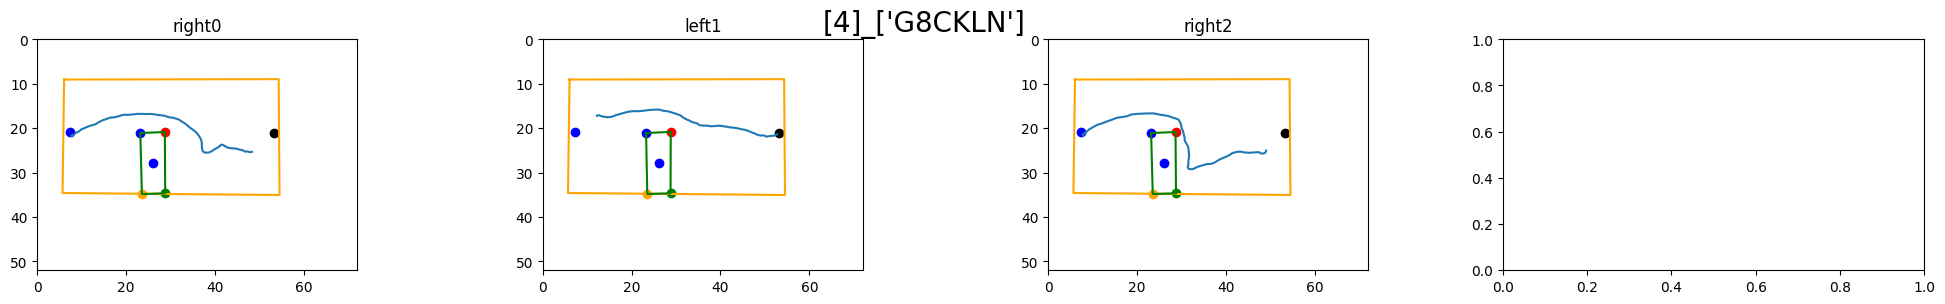

In [56]:

x = test
x = x.reset_index()
y = nearestX_roundup(len(x),4)
fig, ax = plt.subplots(int((y/4)),4, figsize=(25,len(x)),dpi = 100)
fig.suptitle(str(x['obstacle_cluster'].unique()) + '_' +str(x['animal'].unique()) , size = 20)
for ind,row in x.iterrows():
    plt.subplot(int((y/4)),4,ind+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_title(str(row['odd'])+str(ind))
    plt.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'])
    plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
            [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='orange')
    plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
            [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
    #sns.scatterplot(x=row['obstacle_intersect_nose_x'],y=row['obstacle_intersect_nose_y'],hue = row['obstacle_intersect_nose_x'], palette ='magma',legend=False)    
    plt.scatter(row['gt_obstacleTL_x_cm'],row['gt_obstacleTL_y_cm'],color = 'blue')
    plt.scatter(row['gt_obstacleTR_x_cm'],row['gt_obstacleTR_y_cm'],color = 'red')
    plt.scatter(row['gt_obstacleBL_x_cm'],row['gt_obstacleBL_y_cm'],color = 'orange')
    plt.scatter(row['gt_obstacleBR_x_cm'],row['gt_obstacleBR_y_cm'],color = 'green')
    plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
    plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
    plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
    plt.ylim([52,0]); plt.xlim([0, 72])

In [15]:
interp_df = session.df.sample(20)
interp_df = interp_df.reset_index()

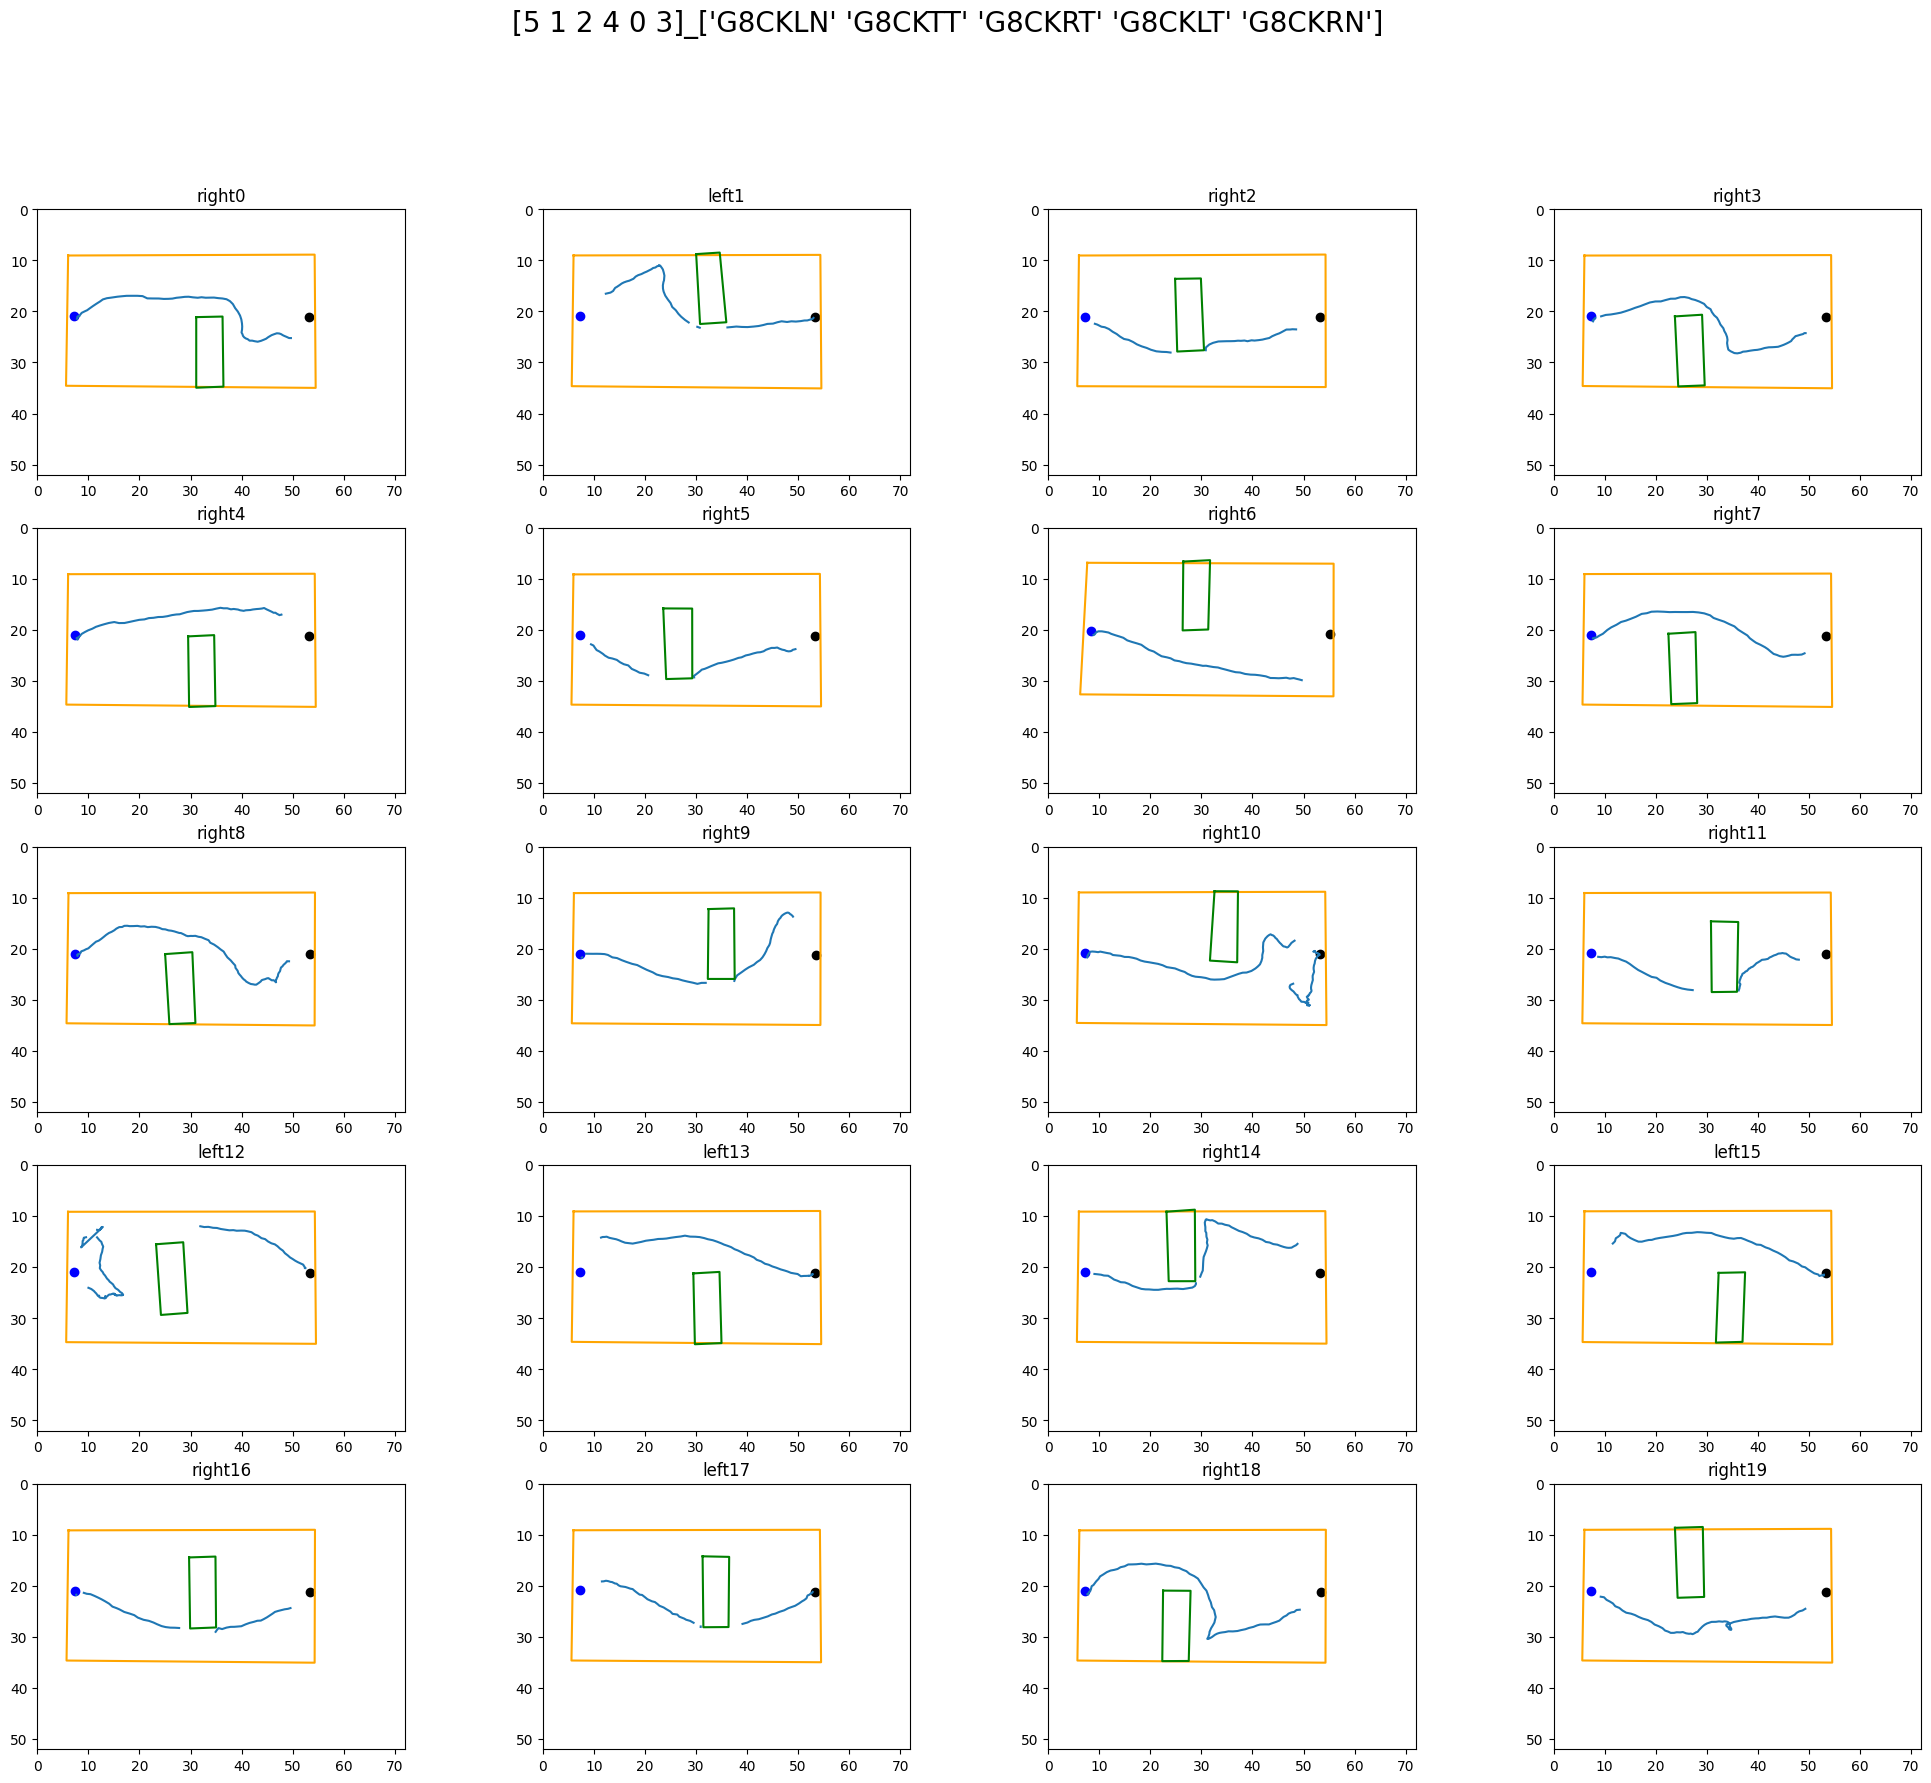

In [23]:
interp_df = session.df.sample(20)
interp_df = interp_df.reset_index()
x = interp_df
y = nearestX_roundup(len(x),4)
fig, ax = plt.subplots(int((y/4)),4, figsize=(25,len(x)),dpi = 100)
fig.suptitle(str(x['obstacle_cluster'].unique()) + '_' +str(x['animal'].unique()) , size = 20)
for ind,row in x.iterrows():
    plt.subplot(int((y/4)),4,ind+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_title(str(row['odd'])+str(ind))
    plt.plot(row['ts_nose_x_cm'],row['ts_nose_y_cm'])
    plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
            [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='orange')
    plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
            [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
    #sns.scatterplot(x=row['obstacle_intersect_nose_x'],y=row['obstacle_intersect_nose_y'],hue = row['obstacle_intersect_nose_x'], palette ='magma',legend=False)    
    
    plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
    plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
    plt.ylim([52,0]); plt.xlim([0, 72])

In [25]:
def plot_single(df,row_num):
    plt.plot(df.at[row_num,'ts_nose_x_cm'],df.at[row_num,'ts_nose_y_cm'])
    plt.plot([df.at[row_num,'arenaTL_x_cm'], df.at[row_num,'arenaTR_x_cm'], df.at[row_num,'arenaBR_x_cm'], df.at[row_num,'arenaBL_x_cm'],df.at[row_num,'arenaTL_x_cm']],
            [df.at[row_num,'arenaTL_y_cm'], df.at[row_num,'arenaTR_y_cm'], df.at[row_num,'arenaBR_y_cm'], df.at[row_num,'arenaBL_y_cm'],df.at[row_num,'arenaTL_y_cm']],color='orange')
    plt.plot([df.at[row_num,'gt_obstacleTL_x_cm'], df.at[row_num,'gt_obstacleTR_x_cm'], df.at[row_num,'gt_obstacleBR_x_cm'], df.at[row_num,'gt_obstacleBL_x_cm'],df.at[row_num,'gt_obstacleTL_x_cm']],
            [df.at[row_num,'gt_obstacleTL_y_cm'], df.at[row_num,'gt_obstacleTR_y_cm'], df.at[row_num,'gt_obstacleBR_y_cm'], df.at[row_num,'gt_obstacleBL_y_cm'],df.at[row_num,'gt_obstacleTL_y_cm']],color='green')
    #sns.scatterplot(x=df.at[row_num,'obstacle_intersect_nose_x'],y=df.at[row_num,'obstacle_intersect_nose_y'],hue = df.at[row_num,'obstacle_intersect_nose_x'], palette ='magma',legend=False)    
    plt.scatter(df.at[row_num,'gt_obstacle_cen_x_cm'],df.at[row_num,'gt_obstacle_cen_y_cm'],color='blue')
    plt.scatter(df.at[row_num,'leftportT_x_cm'],df.at[row_num,'leftportT_y_cm'],color='blue')
    plt.scatter(df.at[row_num,'rightportT_x_cm'],df.at[row_num,'rightportT_y_cm'],color='black')
    plt.ylim([52,0]); plt.xlim([0, 72])

In [24]:
interp_df.at[1,'ts_nose_x_cm']

array([12.346774567795789, 12.887501927300132, 13.267960851177326,
       13.77808377137458, 13.962970005059558, 14.189469137014825,
       14.474594024941224, 15.074153127281912, 15.430167092654846,
       15.858296586005112, 16.40661112837806, 16.964940894197472,
       17.758262606748147, 18.19482927474415, 18.681382088698015,
       19.332230736643673, 19.86123578615193, 20.350872483921165,
       20.80037133878823, 21.27755530187267, 21.604745312106775,
       22.058737995366606, 22.37918016001621, 22.743045302918336,
       22.75713291036667, 23.00806516250061, 23.362634852151952,
       23.526834795706492, 23.699006667711206, 23.821173452437126,
       23.784874778522767, 23.739254607041335, 23.63238293897361,
       23.519038074475002, 23.53895960877253, 23.65978155971178,
       23.98382257533979, 24.489925200167754, 25.020320069099906,
       25.352266718554805, 26.041243061717985, 26.561684266496727,
       27.103469972308535, 27.852253536336413, 28.574505045059073, nan,
   

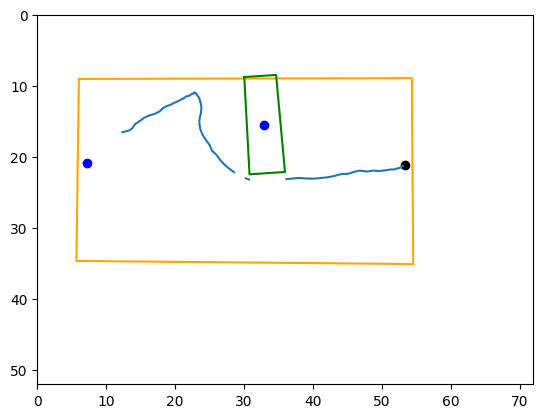

In [26]:
plot_single(interp_df,1)

In [69]:
interp_test = pd.Series(interp_df.iloc[12])

In [44]:
pd.Series(interp_test['ts_nose_x_cm'])

0     12.346775
1     12.887502
2     13.267961
3     13.778084
4      13.96297
        ...    
73    52.639953
74    52.840826
75    52.847966
76     52.95928
77     53.01706
Length: 78, dtype: object

(0.0, 72.0)

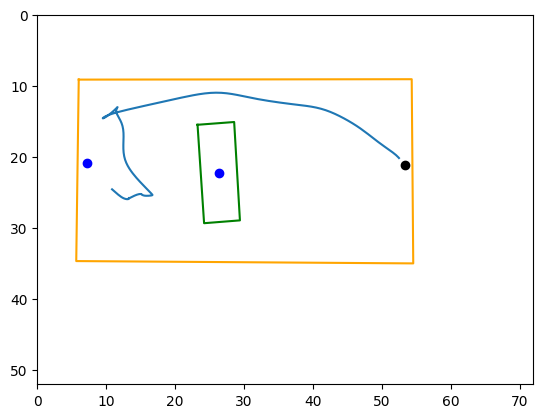

In [71]:
plt.plot(nose_x,nose_y)
plt.plot([interp_test['arenaTL_x_cm'], interp_test['arenaTR_x_cm'], interp_test['arenaBR_x_cm'], interp_test['arenaBL_x_cm'],interp_test['arenaTL_x_cm']],
        [interp_test['arenaTL_y_cm'], interp_test['arenaTR_y_cm'], interp_test['arenaBR_y_cm'], interp_test['arenaBL_y_cm'],interp_test['arenaTL_y_cm']],color='orange')
plt.plot([interp_test['gt_obstacleTL_x_cm'], interp_test['gt_obstacleTR_x_cm'], interp_test['gt_obstacleBR_x_cm'], interp_test['gt_obstacleBL_x_cm'],interp_test['gt_obstacleTL_x_cm']],
        [interp_test['gt_obstacleTL_y_cm'], interp_test['gt_obstacleTR_y_cm'], interp_test['gt_obstacleBR_y_cm'], interp_test['gt_obstacleBL_y_cm'],interp_test['gt_obstacleTL_y_cm']],color='green')
#sns.scatterplot(x=interp_test['obstacle_intersect_nose_x'],y=interp_test['obstacle_intersect_nose_y'],hue = interp_test['obstacle_intersect_nose_x'], palette ='magma',legend=False)    
plt.scatter(interp_test['gt_obstacle_cen_x_cm'],interp_test['gt_obstacle_cen_y_cm'],color='blue')
plt.scatter(interp_test['leftportT_x_cm'],interp_test['leftportT_y_cm'],color='blue')
plt.scatter(interp_test['rightportT_x_cm'],interp_test['rightportT_y_cm'],color='black')
plt.ylim([52,0]); plt.xlim([0, 72])

In [66]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        #>>> # linear interpolation of NaNs
        #>>> nans, x= nan_helper(y)
        #>>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """
    y=y.astype(float)

    return np.isnan(y), lambda z: z.nonzero()[0]


def interp(array):
    """takes in np array to interp across nans"""
    nans, x= nan_helper(array)
    array[nans]= np.interp(x(nans), x(~nans), array[~nans].astype(float))

    return array.astype(float)



In [64]:
from scipy.ndimage import gaussian_filter1d

In [70]:
nose_x = gaussian_filter1d(interp(interp_test['ts_nose_x_cm']),3)
nose_y = gaussian_filter1d(interp(interp_test['ts_nose_y_cm']),3)

In [59]:
nans, x= nan_helper(nose_x)
nose_x[nans]= np.interp(x(nans), x(~nans), nose_x[~nans].astype(float))

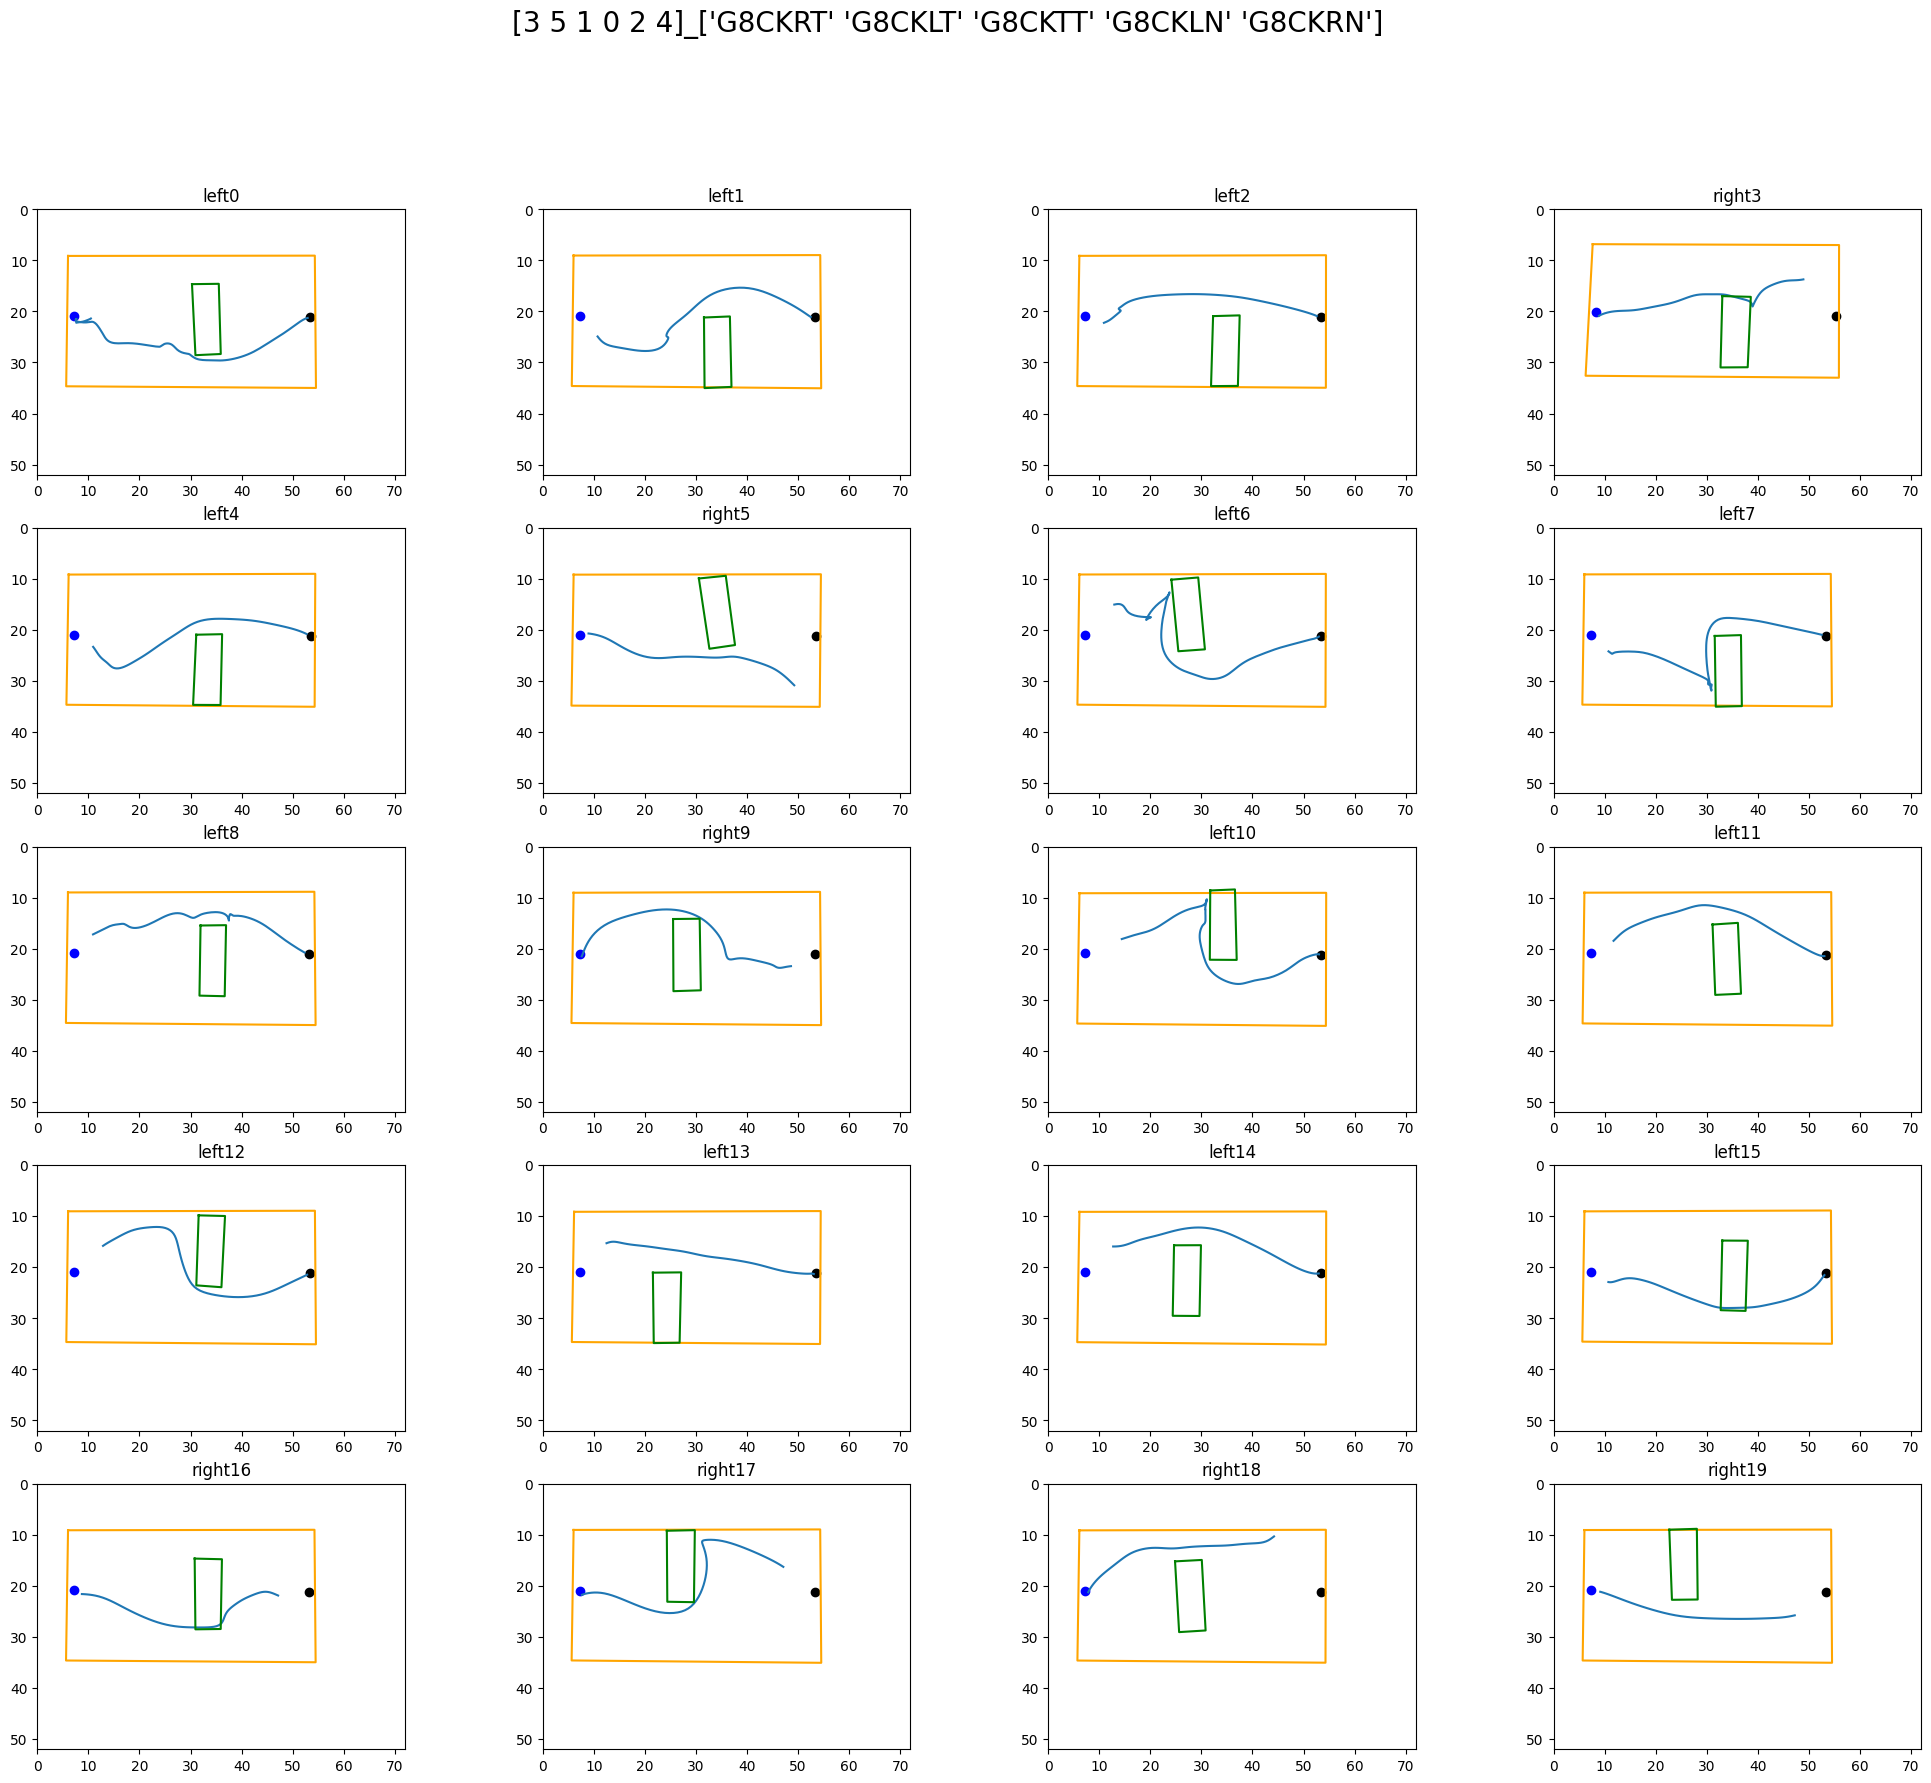

In [76]:
interp_df = session.df.sample(20)
interp_df = interp_df.reset_index()
for ind,row in interp_df.iterrows():
    nose_x = gaussian_filter1d(interp(row['ts_nose_x_cm']),3)
    nose_y = gaussian_filter1d(interp(row['ts_nose_y_cm']),3)
    interp_df.at[ind,'interp_ts_nose_x_cm'] = nose_x.astype(object)
    interp_df.at[ind,'interp_ts_nose_y_cm'] = nose_y.astype(object)
x = interp_df
y = nearestX_roundup(len(x),4)
fig, ax = plt.subplots(int((y/4)),4, figsize=(25,len(x)),dpi = 100)
fig.suptitle(str(x['obstacle_cluster'].unique()) + '_' +str(x['animal'].unique()) , size = 20)
for ind,row in x.iterrows():
    plt.subplot(int((y/4)),4,ind+1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().set_title(str(row['odd'])+str(ind))
    plt.plot(row['interp_ts_nose_x_cm'],row['interp_ts_nose_y_cm'])
    plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
            [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='orange')
    plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
            [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
    #sns.scatterplot(x=row['obstacle_intersect_nose_x'],y=row['obstacle_intersect_nose_y'],hue = row['obstacle_intersect_nose_x'], palette ='magma',legend=False)    
    
    plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
    plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
    plt.ylim([52,0]); plt.xlim([0, 72])

In [77]:
interp_test = pd.Series(interp_df.iloc[1])

In [82]:
interp_test['gt_obstacleBL_x_cm'][21]

IndexError: invalid index to scalar variable.

In [81]:
np.argmax(interp_test['ts_nose_x_cm']>interp_test['gt_obstacleBL_x_cm']-10)

21

(0.0, 72.0)

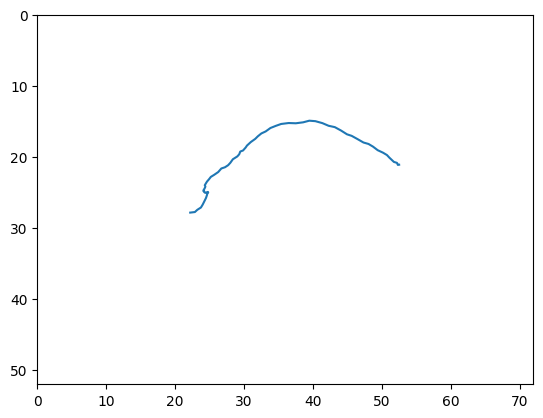

In [86]:
plt.plot(interp_test['ts_nose_x_cm'][21:],interp_test['ts_nose_y_cm'][21:])
plt.ylim([52,0]); plt.xlim([0, 72])

In [90]:
interp_test['rightportT_x_cm']

53.308994034891526

In [89]:
interp_test['ts_nose_x_cm']

array([10.026195251108774, 10.532673107980305, 10.908515046238657,
       11.05385272590348, 11.250863658904898, 11.51712086839098,
       11.897088101635017, 12.234409935295187, 12.825466395297344,
       13.369215056077385, 14.135354619267467, 14.817426656881786,
       15.635306907252502, 16.4992634019041, 17.163470203046145,
       17.98603533100313, 18.67935225787438, 19.238446258849233,
       20.148506207929305, 20.853170949398397, 21.679020223865347,
       22.189981839840904, 22.866215526220824, 23.220773213808847,
       23.747914220155558, 24.00232436798789, 24.222305397760753,
       24.478596594926962, 24.60833694476923, 24.680379951206913,
       24.647131516943173, 24.745887790021733, 24.804100943180767,
       24.60722487786744, 24.546621963919453, 24.392366454142188,
       24.32472912551543, 24.256327546656163, 24.21665278535995,
       24.234377238894655, 24.221354225644752, 24.09627036019126,
       24.107166249729012, 24.149268629410834, 24.25995241153604,
       2

(0.0, 72.0)

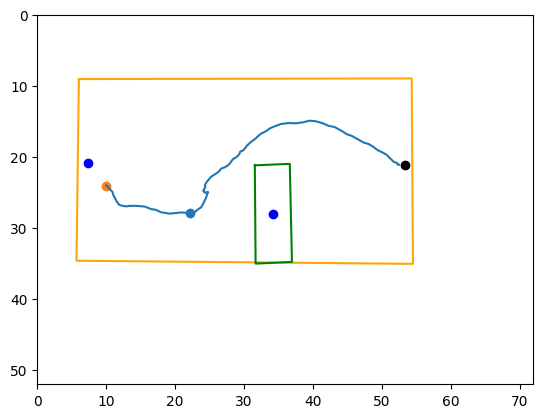

In [88]:
plt.plot(interp_test['ts_nose_x_cm'],interp_test['ts_nose_y_cm'])
plt.plot([interp_test['arenaTL_x_cm'], interp_test['arenaTR_x_cm'], interp_test['arenaBR_x_cm'], interp_test['arenaBL_x_cm'],interp_test['arenaTL_x_cm']],
        [interp_test['arenaTL_y_cm'], interp_test['arenaTR_y_cm'], interp_test['arenaBR_y_cm'], interp_test['arenaBL_y_cm'],interp_test['arenaTL_y_cm']],color='orange')
plt.plot([interp_test['gt_obstacleTL_x_cm'], interp_test['gt_obstacleTR_x_cm'], interp_test['gt_obstacleBR_x_cm'], interp_test['gt_obstacleBL_x_cm'],interp_test['gt_obstacleTL_x_cm']],
        [interp_test['gt_obstacleTL_y_cm'], interp_test['gt_obstacleTR_y_cm'], interp_test['gt_obstacleBR_y_cm'], interp_test['gt_obstacleBL_y_cm'],interp_test['gt_obstacleTL_y_cm']],color='green')
#sns.scatterplot(x=interp_test['obstacle_intersect_nose_x'],y=interp_test['obstacle_intersect_nose_y'],hue = interp_test['obstacle_intersect_nose_x'], palette ='magma',legend=False)    
plt.scatter(interp_test['gt_obstacle_cen_x_cm'],interp_test['gt_obstacle_cen_y_cm'],color='blue')
plt.scatter(interp_test['leftportT_x_cm'],interp_test['leftportT_y_cm'],color='blue')
plt.scatter(interp_test['rightportT_x_cm'],interp_test['rightportT_y_cm'],color='black')
plt.scatter(interp_test['ts_nose_x_cm'][21],interp_test['ts_nose_y_cm'][21])
plt.scatter(interp_test['ts_nose_x_cm'][0],interp_test['ts_nose_y_cm'][0])
plt.ylim([52,0]); plt.xlim([0, 72])

In [208]:
df = pd.read_hdf(r"D:\obstacle_avoidance\recordings\042823\G8CKLN\oa\processed_G8CKLN_042823_oa.h5")

In [194]:
df

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,rightear_y,...,gt_obstacleBL_y_cm,gt_obstacle_cen_x,gt_obstacle_cen_x_cm,gt_obstacle_cen_y,gt_obstacle_cen_y_cm,time,obstacle_cluster,mean_gt_obstacle_cen_x_cm,mean_gt_obstacle_cen_y_cm,cluster_label
1,53950.560793,53955.750912,"[53950.571776, 53950.588467, 53950.605862, 539...","[[1284, 1285, 1286, 1287, 1288, 1289, 1290, 12...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[671.5906982421875, 673.7359619140625, 676.169...","[266.6916198730469, 266.8547058105469, 267.870...","[671.5349731445312, 671.4368286132812, 673.386...","[285.6947937011719, 286.2433776855469, 286.085...",...,28.502808,334.053289,25.990295,274.358220,21.345849,5.166667,2,26.79910,21.674154,2.0
2,53955.750912,53958.114393,"[53955.75703, 53955.773632, 53955.791564, 5395...","[1595, 1596, 1597, 1598, 1599, 1600, 1601, 160...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[106.0430908203125, 105.33464813232422, 104.59...","[279.4571533203125, 279.2516784667969, 278.547...","[112.64200592041016, 112.10045623779297, 111.5...","[263.213623046875, 262.81658935546875, 261.931...",...,28.386277,335.024805,26.065882,273.747835,21.298359,2.350000,2,26.79910,21.674154,2.0
3,53958.114393,53961.108915,"[53958.124454, 53958.142169, 53958.15776, 5395...","[[1737, 1738, 1739, 1740, 1741, 1742, 1743, 17...","[682.2976684570312, 683.12744140625, nan, nan,...","[274.8915100097656, 275.080078125, nan, nan, n...","[668.080078125, 670.3260498046875, 672.5081176...","[271.2999267578125, 271.7380676269531, 271.354...","[672.9752197265625, 674.0545654296875, 675.565...","[288.57000732421875, 288.03387451171875, 286.7...",...,28.508715,334.273028,26.007391,274.551863,21.360915,2.966667,2,26.79910,21.674154,2.0
4,53961.108915,53964.852940,"[53961.125427, 53961.142144, 53961.15927, 5396...","[1917, 1918, 1919, 1920, 1921, 1922, 1923, 192...","[98.7120132446289, 98.35353088378906, 97.90589...","[277.3341064453125, 277.6127624511719, 277.443...","[117.34370422363281, 116.2473373413086, 115.83...","[267.73638916015625, 267.8100891113281, 267.67...","[107.49760437011719, 104.98799133300781, 104.5...","[252.53250122070312, 255.27244567871094, 255.2...",...,23.856897,427.755242,33.280573,214.293473,16.672641,3.716667,1,33.42178,16.326281,1.0
6,53978.456947,53981.152294,"[53978.464729, 53978.481766, 53978.498291, 539...","[2957, 2958, 2959, 2960, 2961, 2962, 2963, 296...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[107.61906433105469, 105.91256713867188, 105.2...","[275.3627624511719, 274.444091796875, 274.7034...","[108.35797882080078, 107.81783294677734, 107.7...","[259.07940673828125, 257.42010498046875, 257.5...",...,23.832781,427.623105,33.270292,214.359688,16.677793,2.683333,1,33.42178,16.326281,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,54485.629888,54489.992409,"[54485.640307, 54485.657024, 54485.674009, 544...","[[33377, 33378, 33379, 33380, 33381, 33382, 33...","[682.966064453125, 683.2424926757812, 683.3145...","[276.9222106933594, 275.9981689453125, 275.359...","[667.6292724609375, 668.2237548828125, 668.244...","[272.69921875, 271.8544921875, 271.16183471679...","[673.0794677734375, 673.9896240234375, 674.264...","[289.4991455078125, 288.879150390625, 288.1945...",...,23.671277,439.211903,34.171934,211.749615,16.474722,4.350000,1,33.42178,16.326281,1.0
92,54489.992409,54496.157491,"[54490.00846, 54490.025497, 54490.041792, 5449...","[33639, 33640, 33641, 33642, 33643, 33644, 336...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[113.0038833618164, 110.29386138916016, 110.04...","[274.6064147949219, 273.2816467285156, 273.350...","[109.80284881591797, 107.74754333496094, 107.4...","[255.919647

In [209]:
keys = ['nose','leftear','rightear','spine','midspine','tailbase']
keys_list = list_columns(df,keys)
keys_list= [col for col in keys_list if 'likelihood' not in col]
keys_list= [col for col in keys_list if 'ts_'  in col]
#keys_list= [col for col in keys_list if 'lind' not in col]

In [200]:
keys_list

['ts_nose_x',
 'ts_nose_y',
 'ts_nose_x_cm',
 'ts_nose_y_cm',
 'ts_leftear_x',
 'ts_leftear_y',
 'ts_leftear_x_cm',
 'ts_leftear_y_cm',
 'ts_rightear_x',
 'ts_rightear_y',
 'ts_rightear_x_cm',
 'ts_rightear_y_cm',
 'ts_spine_x',
 'ts_spine_y',
 'ts_midspine_x',
 'ts_midspine_y',
 'ts_spine_x_cm',
 'ts_spine_y_cm',
 'ts_midspine_x_cm',
 'ts_midspine_y_cm',
 'ts_midspine_x',
 'ts_midspine_y',
 'ts_midspine_x_cm',
 'ts_midspine_y_cm',
 'ts_tailbase_x',
 'ts_tailbase_y',
 'ts_tailbase_x_cm',
 'ts_tailbase_y_cm']

In [210]:
keys = ['nose','leftear','rightear','spine','midspine','tailbase']
keys_list = list_columns(df,keys)
keys_list= [col for col in keys_list if 'likelihood' not in col]
keys_list= [col for col in keys_list if 'ts_'  in col]
for ind, row in df.iterrows(): 
    """interpolate and smooth key points
        interpolate across nans 
        gausian smooth sigma 3 """
    for key in keys_list:
        interp_smooth = gaussian_filter1d(interpolate_array(row[key]),3)
        #resample = signal.resample(interp_smooth[~np.isnan(interp_smooth)],200)
        df.at[ind, 'resample_' + key] = interp_smooth.astype(object)

In [168]:
keys = ['nose','leftear','rightear','spine','midspine','tailbase']
keys_list = list_columns(df,keys)
keys_list= [col for col in keys_list if 'likelihood' not in col]
keys_list= [col for col in keys_list if 'lind' not in col]
# check if odd or even trial
#  get first index when nose crosses a distance thresh hold
#trail start = ts
##odd tiral at 16 cm even at 56 cm     
for ind, row in df.iterrows(): 
    """interpolate and smooth key points
        interpolate across nans 
        gausian smooth sigma 3 """
    for key in keys_list:
        interp_smooth = gaussian_filter1d(interpolate_array(row[key]),3)
        resample = signal.resample(interp_smooth[~np.isnan(interp_smooth)],200)
        df.at[ind, key] = resample.astype(float)

    if row['odd'] == 'left':
        nose_list = row['nose_x_cm'] 
        odd_ind = np.argmax(nose_list>10)
        for key in keys_list:
            df.at[ind,'ts_' + key] = row[key][odd_ind:]
        #use odd_ind to index into obstacle 
        # iterate over columns list  
        #create gt_obstacle points
    else: 
        nose_list = row['nose_x_cm']
        even_ind = np.argmax(nose_list<50)
        for key in keys_list:
            df.at[ind,'ts_' + key] = row[key][even_ind:]

In [ ]:

by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    by_date = animal_frame.groupby(['date'])
    for date, date_frame in by_date:
        df = date_frame
        df = df.reset_index()
        #savepath_session = os.path.join(*[savepath,str(pd.unique(df.date).item()),str(pd.unique(df.animal).item()),str(pd.unique(df.task).item())])
        con_df = pd.DataFrame()
        obstacle_cluster_list = df['obstacle_cluster']
        con_list = find_consecutive_repeats(obstacle_cluster_list)
        
        for i in range(len(con_list)):
            con_df = con_df.append(df.loc[con_list[i][0]:con_list[i][1]])
        con_df = con_df.reset_index()
        row_num = nearestX_roundup(len(con_df),3)/3
        fig, ax = plt.subplots(int(row_num),3, figsize=(15,int(len(con_df))),dpi = 90)
        #pdf = PdfPages(os.path.join((savepath_session),(str(pd.unique(df.date).item()) + '_' + str(pd.unique(df.animal).item()))+ '_consective_trials.pdf')) 
        fig.suptitle(str(con_df['animal'].unique()) + '_' +str(con_df['date'].unique()) , size = 20)
        fig.tight_layout()
        plt.subplots_adjust(top=0.95)
        for ind,row in con_df.iterrows():
            plt.subplot(int(row_num),3,ind+1)
            plt.gca().set_aspect('equal', adjustable='datalim')
            plt.gca().set_title(str(row['odd'])+str(row['obstacle_cluster']))
            plt.plot(row['resample_ts_nose_x_cm'],row['resample_ts_nose_y_cm'])
            plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                    [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='orange')
            plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                    [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
            #sns.scatterplot(x=row['obstacle_intersect_nose_x'],y=row['obstacle_intersect_nose_y'],hue = row['obstacle_intersect_nose_x'], palette ='magma',legend=False)    
            #plt.scatter(row['gt_obstacleTL_x_cm'],row['gt_obstacleTL_y_cm'],color = 'blue')
            #plt.scatter(row['gt_obstacleTR_x_cm'],row['gt_obstacleTR_y_cm'],color = 'red')
            #plt.scatter(row['gt_obstacleBL_x_cm'],row['gt_obstacleBL_y_cm'],color = 'orange')
            #plt.scatter(row['gt_obstacleBR_x_cm'],row['gt_obstacleBR_y_cm'],color = 'green')
            #plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
            plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
            plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
            plt.ylim([52,0]); plt.xlim([0, 72])
        

In [185]:

by_animal = df.groupby(['animal'])
for animal,animal_frame in by_animal:
    by_date = animal_frame.groupby(['date'])
    for date, date_frame in by_date:
        df = date_frame
        #savepath_session = os.path.join(*[savepath,str(pd.unique(df.date).item()),str(pd.unique(df.animal).item()),str(pd.unique(df.task).item())])
        con_df = pd.DataFrame()
        obstacle_cluster_list = df['obstacle_cluster']
        con_list = find_consecutive_repeats(obstacle_cluster_list[:40])

In [187]:
con_list

[(1, 3, 2, 3),
 (5, 7, 1, 3),
 (9, 11, 5, 3),
 (19, 21, 2, 3),
 (28, 30, 5, 3),
 (31, 33, 3, 3),
 (40, 42, 0, 3),
 (43, 45, 3, 3)]

In [ ]:
con_df

In [103]:
df.loc[con_list[1][0]-1:con_list[1][1]]

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,leftear_x,leftear_y,rightear_x,rightear_y,...,gt_obstacleBL_y_cm,gt_obstacle_cen_x,gt_obstacle_cen_x_cm,gt_obstacle_cen_y,gt_obstacle_cen_y_cm,time,obstacle_cluster,mean_gt_obstacle_cen_x_cm,mean_gt_obstacle_cen_y_cm,cluster_label
33,50357.516185,50364.680550,"[50357.520358, 50357.53847, 50357.553728, 5035...","[[12291, 12292, 12293, 12294, 12295, 12296, 12...","[683.2761840820312, 683.2761840820312, 683.276...","[275.6552734375, 275.6552734375, 275.655273437...","[678.9401928570085, 679.1861148589064, 679.613...","[263.5275492752777, 263.628343099635, 263.8282...","[676.234768956159, 676.5715348390399, 677.1730...","[285.28981546310433, 285.230372381236, 285.124...",...,34.723237,330.537547,25.648206,358.711343,27.834365,7.150000,4,25.733535,27.837449,4.0
34,50364.680550,50366.691878,"[50364.68942, 50364.706176, 50364.723891, 5036...","[12721, 12722, 12723, 12724, 12725, 12726, 127...","[97.77501946635019, 97.71652525344817, 97.6080...","[278.3965210658137, 278.42498368703986, 278.47...","[117.5665193132311, 117.42559905782508, 117.17...","[272.6151158282664, 272.6064347520862, 272.591...","[106.10353494354638, 105.89381990970476, 105.5...","[258.59419926319964, 258.663130549422, 258.786...",...,34.724265,331.188423,25.698711,358.564865,27.822998,2.000000,4,25.733535,27.837449,4.0
35,50366.691878,50372.394073,"[50366.706969, 50366.723686, 50366.740441, 503...","[[12842, 12843, 12844, 12845, 12846, 12847, 12...","[681.780517578125, 681.780517578125, 681.78051...","[276.9971008300781, 276.9971008300781, 276.997...","[675.3887391175859, 675.7394933139751, 676.381...","[264.85420472356486, 264.95988171839025, 265.1...","[674.120106385316, 674.4345976965976, 675.0154...","[284.3180939162871, 284.3726083370552, 284.475...",...,34.723263,330.554195,25.649498,358.674969,27.831542,5.683333,4,25.733535,27.837449,4.0
